['model=command-r', 'execmode=trace', 'prompt=standard', 'icl=2']
['model=command-r', 'execmode=trace', 'prompt=standard', 'icl=6']
['model=command-r-plus', 'execmode=trace', 'prompt=standard', 'icl=2']
['model=command-r-plus', 'execmode=trace', 'prompt=standard', 'icl=4']
['model=command-r-plus', 'execmode=trace', 'prompt=standard', 'icl=6']
['model=command-r-plus', 'execmode=trace', 'prompt=standard', 'icl=8']
['model=command-r', 'execmode=trace', 'prompt=standard', 'icl=8']
['model=gpt-3.5-turbo', 'execmode=trace', 'prompt=standard', 'icl=2']
['model=gpt-3.5-turbo', 'execmode=trace', 'prompt=standard', 'icl=4']
['model=gpt-3.5-turbo', 'execmode=trace', 'prompt=standard', 'icl=6']


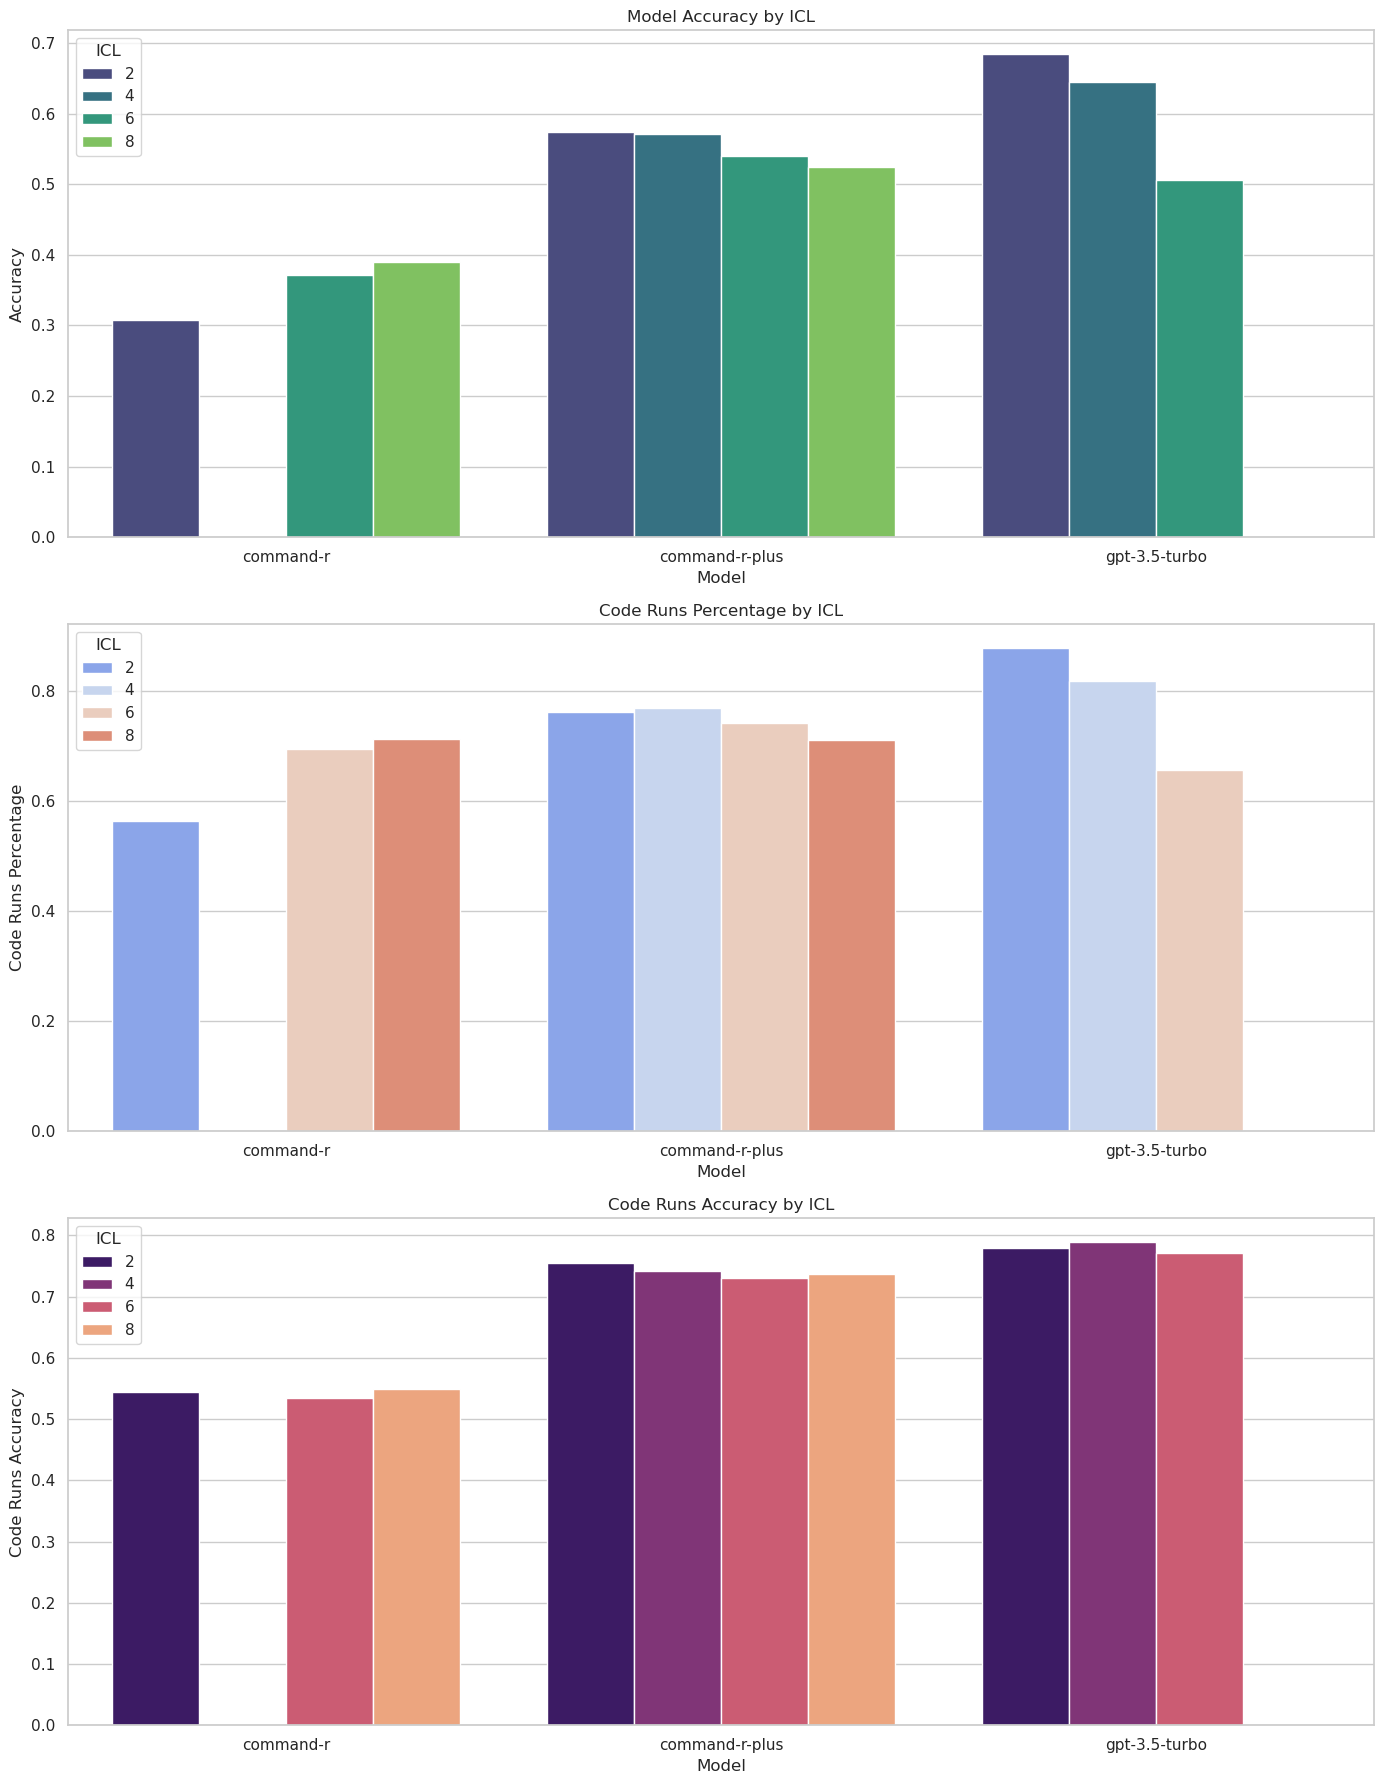

['model=command-r-plus', 'execmode=trace', 'prompt=standard', 'icl=2']
['model=command-r-plus', 'execmode=trace', 'prompt=standard', 'icl=4']
['model=command-r-plus', 'execmode=trace', 'prompt=standard', 'icl=6']
['model=command-r', 'execmode=trace', 'prompt=standard', 'icl=2']
['model=command-r', 'execmode=trace', 'prompt=standard', 'icl=4']
['model=command-r', 'execmode=trace', 'prompt=standard', 'icl=6']
['model=gpt-3.5-turbo', 'execmode=trace', 'prompt=standard', 'icl=2']
['model=gpt-3.5-turbo', 'execmode=trace', 'prompt=standard', 'icl=6']


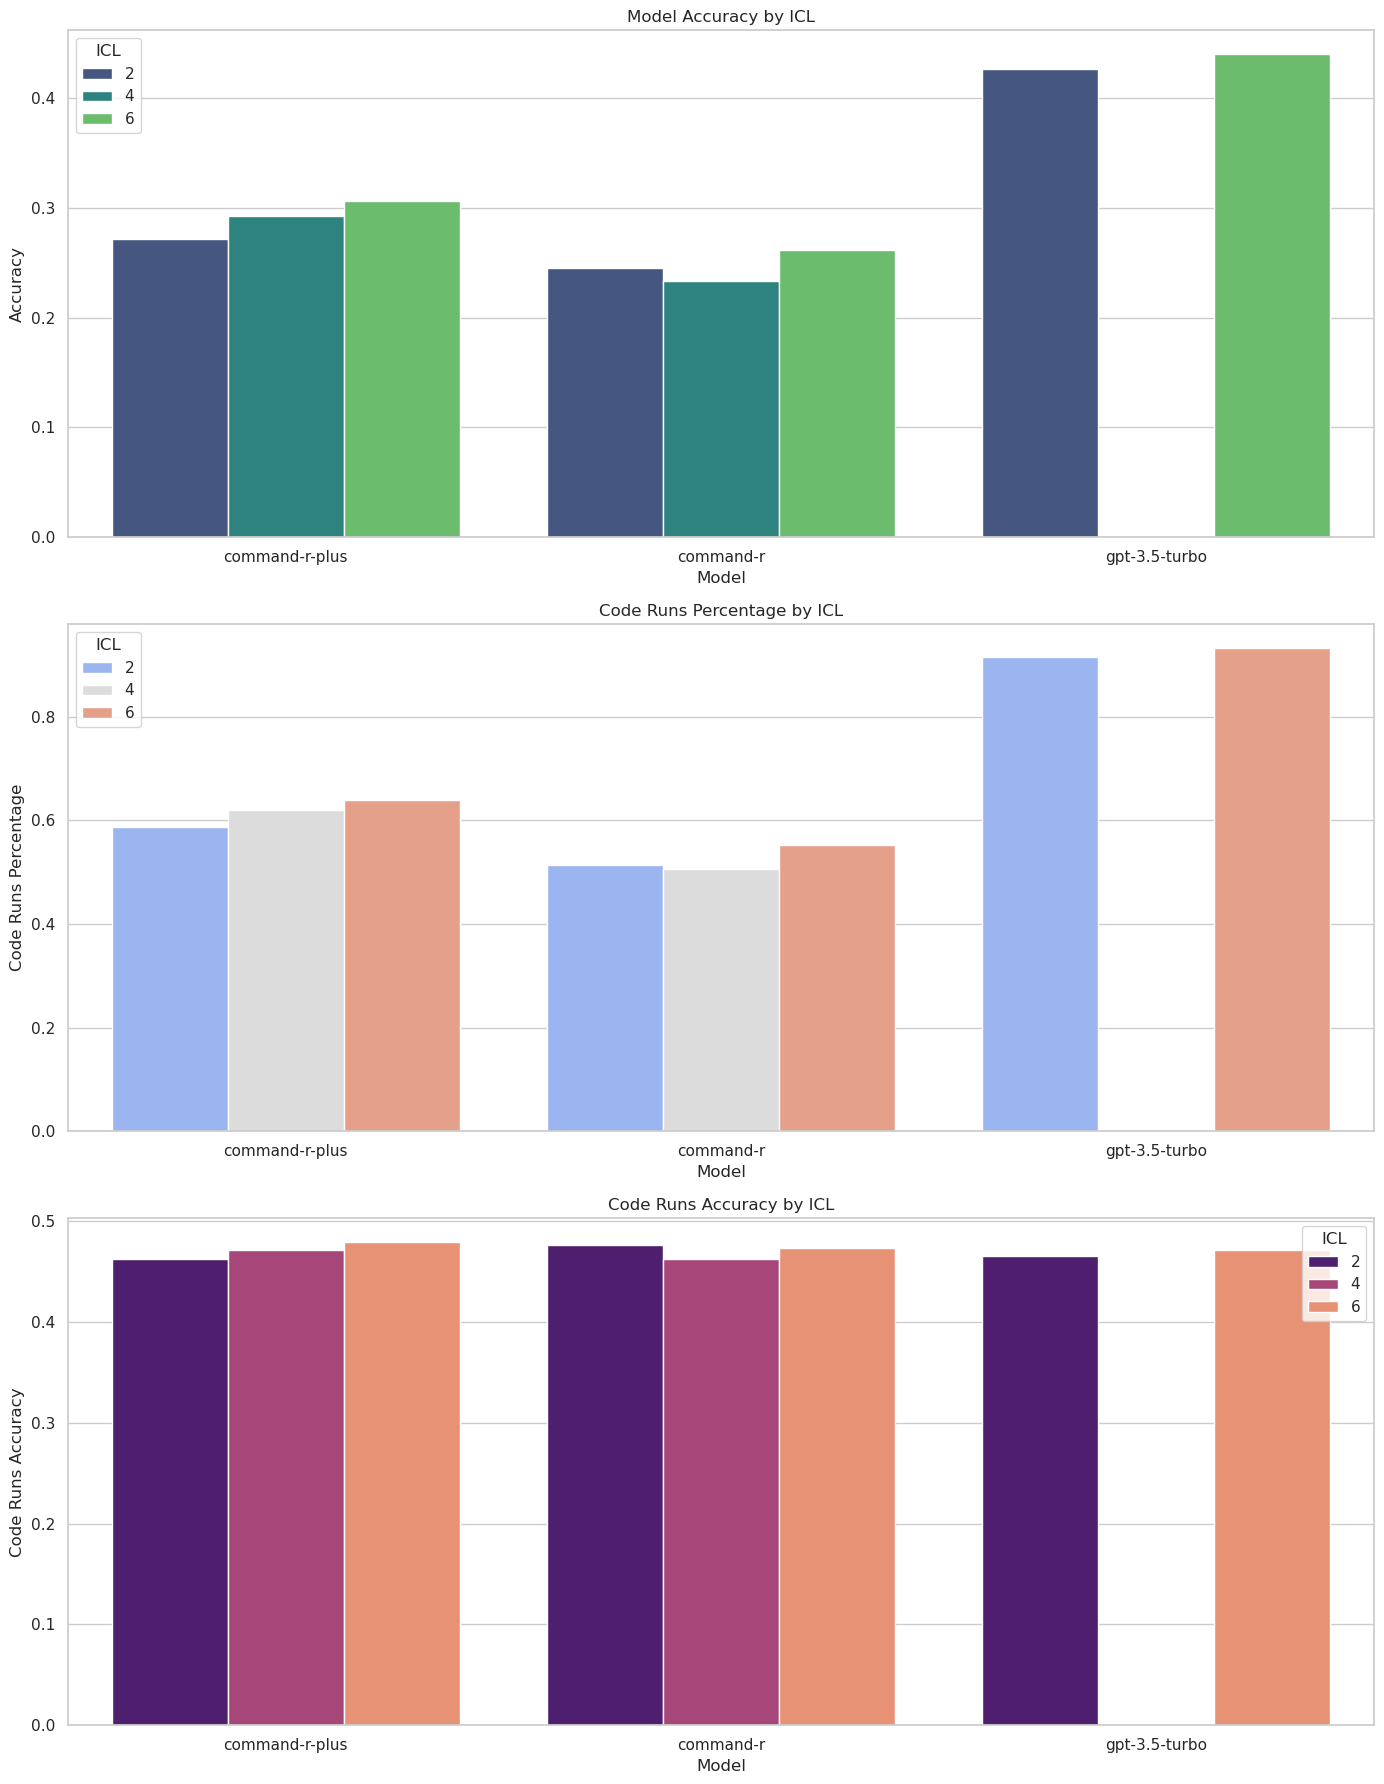

['model=command-r-plus', 'execmode=trace', 'prompt=standard', 'icl=2']
['model=command-r-plus', 'execmode=trace', 'prompt=standard', 'icl=4']
['model=command-r-plus', 'execmode=trace', 'prompt=standard', 'icl=6']
['model=command-r', 'execmode=trace', 'prompt=standard', 'icl=2']
['model=command-r', 'execmode=trace', 'prompt=standard', 'icl=4']
['model=command-r', 'execmode=trace', 'prompt=standard', 'icl=6']
['model=gpt-3.5-turbo', 'execmode=trace', 'prompt=standard', 'icl=2']
['model=gpt-3.5-turbo', 'execmode=trace', 'prompt=standard', 'icl=4']
['model=gpt-3.5-turbo', 'execmode=trace', 'prompt=standard', 'icl=6']


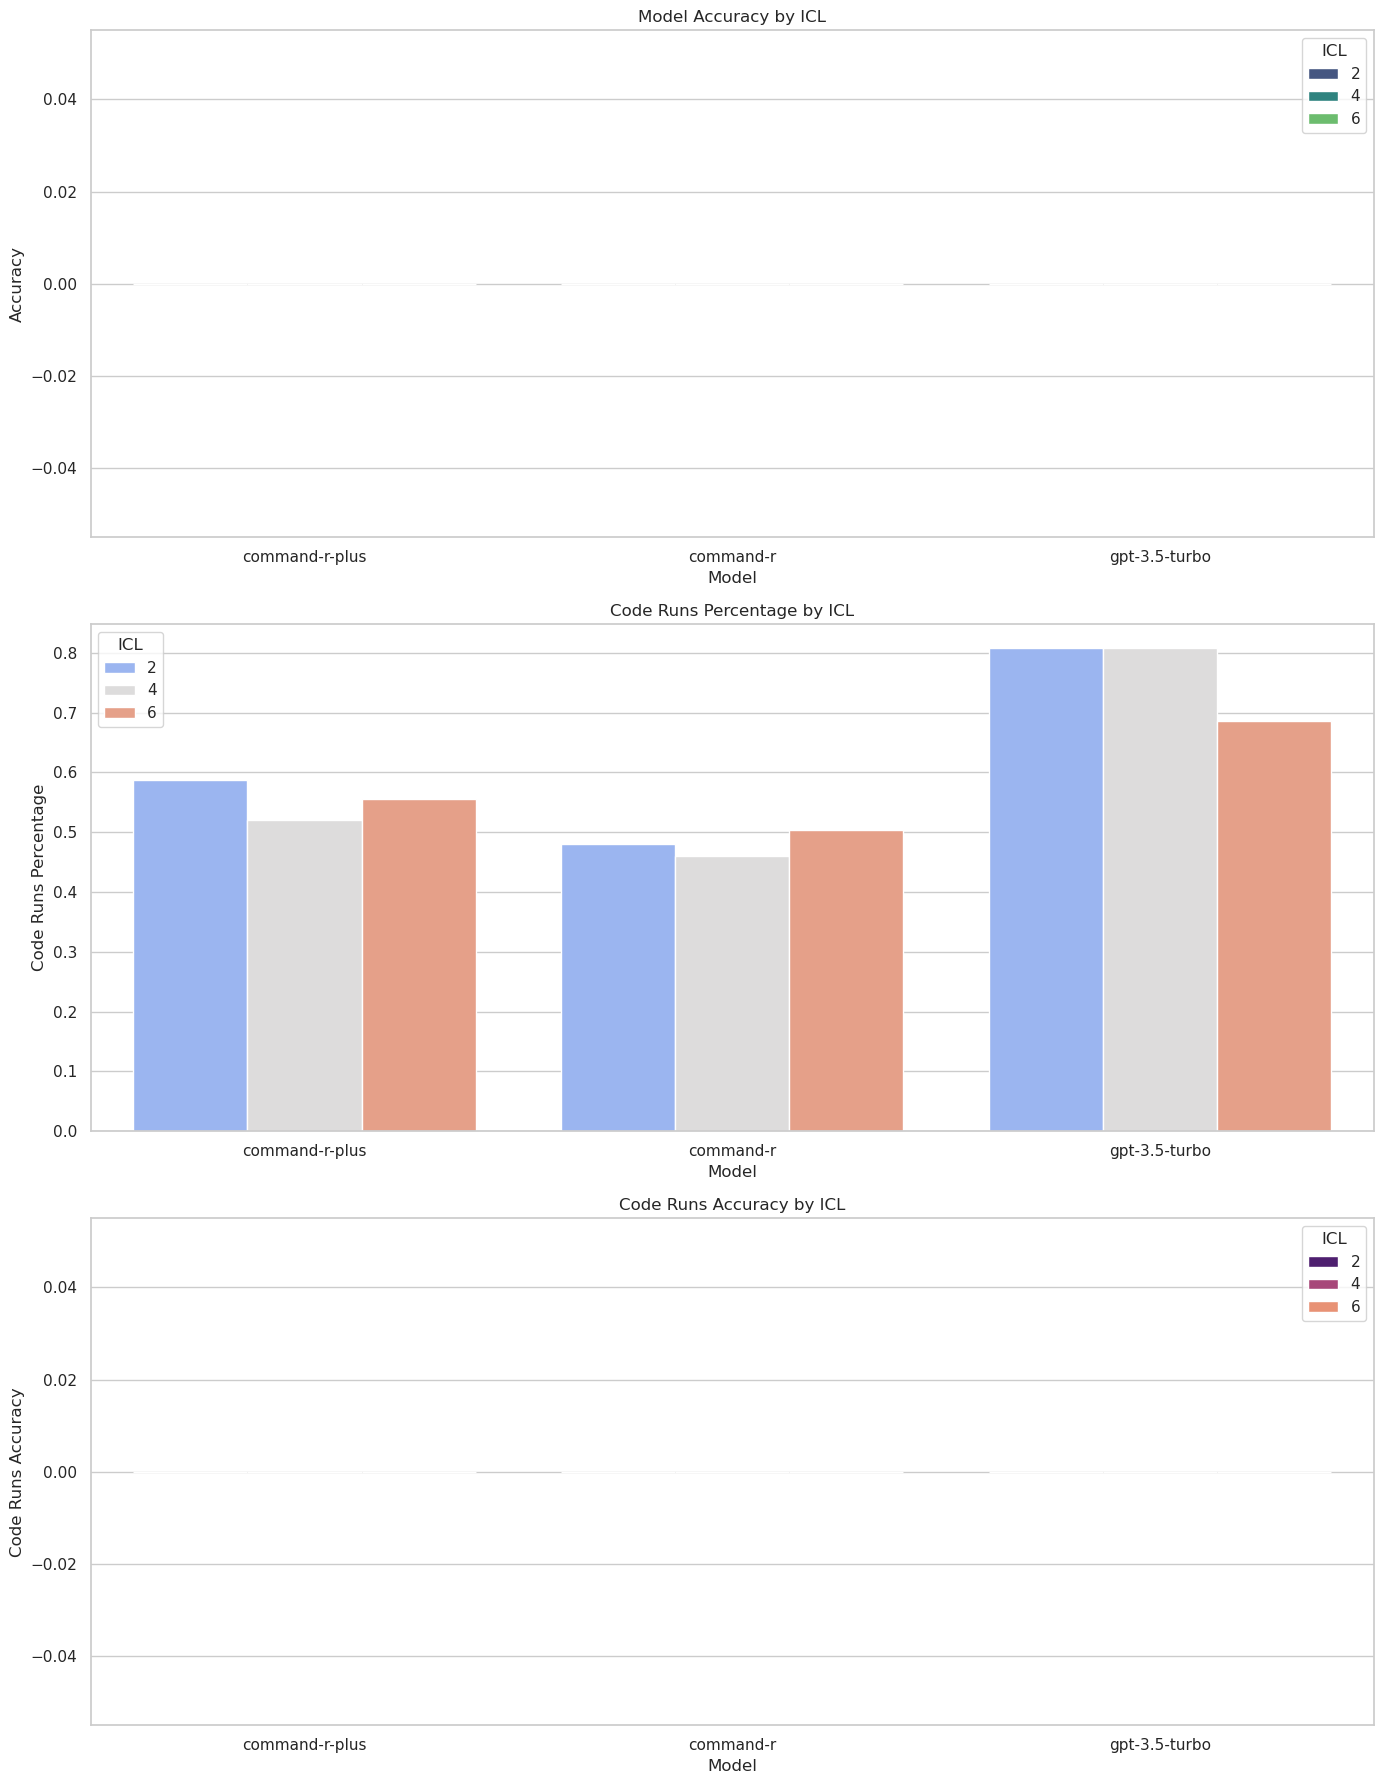

In [2]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_results(filename):
    # Load JSON data from the file
    with open(filename, 'r') as file:
        data = json.load(file)
    
    # Prepare lists to hold data
    models = []
    icls = []
    execmodes = []
    prompts = []
    accuracies = []
    code_runs_percs = []
    code_runs_accs = []
    
    # Extract and organize data from JSON
    for key, values in data.items():
        file_details = key.split('/')[-1].replace('_output.json', '').split('_')
        print(file_details)
        details_dict = {item.split('=')[0]: item.split('=')[1] for item in file_details}
        
        models.append(details_dict.get('model'))
        icls.append(details_dict.get('icl'))
        execmodes.append(details_dict.get('execmode'))
        prompts.append(details_dict.get('prompt'))
        accuracies.append(values['Accuracy'])
        code_runs_percs.append(values['code_runs_perc'])
        code_runs_accs.append(values['code_runs_acc'])

    # Create DataFrame
    df = pd.DataFrame({
        'Model': models,
        'ICL': icls,
        'ExecMode': execmodes,
        'Prompt': prompts,
        'Accuracy': accuracies,
        'Code Runs Percentage': code_runs_percs,
        'Code Runs Accuracy': code_runs_accs
    })

    # Plotting
    sns.set(style="whitegrid")
    fig, axs = plt.subplots(3, 1, figsize=(14, 18))

    #sort the dataframe by icl
    df = df.sort_values(by=['ICL'])

    # Accuracy Plot
    sns.barplot(x='Model', y='Accuracy', hue='ICL', data=df, ax=axs[0], palette='viridis')
    axs[0].set_title('Model Accuracy by ICL')
    axs[0].tick_params(axis='x', rotation=0)

    # Code Runs Percentage Plot
    sns.barplot(x='Model', y='Code Runs Percentage', hue='ICL', data=df, ax=axs[1], palette='coolwarm')
    axs[1].set_title('Code Runs Percentage by ICL')
    axs[1].tick_params(axis='x', rotation=0)
    
    # Code Runs Accuracy Plot
    sns.barplot(x='Model', y='Code Runs Accuracy', hue='ICL', data=df, ax=axs[2], palette='magma')
    axs[2].set_title('Code Runs Accuracy by ICL')
    axs[2].tick_params(axis='x', rotation=0)

    #save the plot
    base_filename = filename.split("/")[-1].replace(".json", "")
    plt.savefig(f'results_plot_{base_filename}.pdf')

    plt.tight_layout()
    plt.show()

    return df
# To use this function, call it with the filename:
# plot_results_with_details('results.json')


a =  plot_results('results/GSM8k_code_exact.json')
b = plot_results('results/SQA_code_exact.json')
c = plot_results('results/AQUA_code_exact.json')

# Faith vs accuracy

In [3]:
import os
import json

def get_all_traces(filename):
    # Load JSON data from the file
    with open(filename, 'r') as file:
        data = json.load(file)
    
    return data['rouge']


faithfullnes_dict = {}
for file in os.listdir("traces"):
    if file.endswith(".json"): #and "clutrr" in file:
        rouge_scores = get_all_traces(f"traces/{file}")

        #model_name shoulbe be taken from traces/results_aqua_all_model=command-r_execmode=trace_prompt=standard_icl=2_output.json.json
        model_name = file.split("model=")[1].split("_execmode")[0]
        dataset = file.split("results_")[1].split("_all")[0]
        icl = file.split("icl=")[1].split("_output")[0]
        # print(f"Model: {model_name}, ICL: {icl}")
        # print(rouge_scores)
        # print("_" * 50)

        faithfullnes_dict[f"{dataset}_{model_name}_{icl}_trace"] = rouge_scores

print(faithfullnes_dict)


{'aqua_command-r-plus_4_trace': {'rouge1': 0.8013940638074303, 'rouge2': 0.6870167899368012, 'rougeL': 0.7453203640234901, 'rougeLsum': 0.8020991309337904}, 'clutrr_command-r-plus_4_trace': {'rouge1': 0.6790549654911076, 'rouge2': 0.5878081878453696, 'rougeL': 0.6368982973641313, 'rougeLsum': 0.679032046262695}, 'sports_gpt-3.5-turbo_10_trace': {'rouge1': 0.9718153424779825, 'rouge2': 0.9595341300461999, 'rougeL': 0.9663511368689177, 'rougeLsum': 0.9718039281933853}, 'date_command-r_6_trace': {'rouge1': 0.6198224945178251, 'rouge2': 0.49163802742619805, 'rougeL': 0.5294293455604135, 'rougeLsum': 0.6168377828133164}, 'gsm8k_Meta-Llama-3-8B_2_trace': {'rouge1': 0.3775615824043954, 'rouge2': 0.26977609951536785, 'rougeL': 0.33626959938644885, 'rougeLsum': 0.37706400243686133}, 'date_command-r-plus_8_trace': {'rouge1': 0.6706523708062349, 'rouge2': 0.5572923748870724, 'rougeL': 0.5926288305722813, 'rougeLsum': 0.6699159301606696}, 'svamp_gpt-3.5-turbo_4_trace': {'rouge1': 0.937631764568782

In [4]:
def read_results(result_dir):
    results = {}
    for file in os.listdir(result_dir):
        if file.endswith(".csv") and "only" not in file:
            results[file] = pd.read_csv(f"{result_dir}/{file}")

    return results

results = read_results("results")
results.keys()

dict_keys(['overall_results.csv', 'overall_ASDiv_trace_exact.csv', 'overall_SQA_trace_exact.csv', 'overall_SVAMP_trace_exact.csv', 'overall_code_results.csv', 'overall_CLUTRR_trace_code.csv', 'overall_SQA_code_exact.csv', 'overall_AQUA_trace_exact.csv', 'overall_MultiArith_trace_exact.csv', 'overall_Date_trace_exact.csv', 'overall_CLUTRR_trace_exact.csv', 'overall_Sports_trace_exact.csv', 'overall_CLUTRR_code_exact.csv', 'overall_GSM8k_trace_exact.csv'])

In [5]:
#make markdown table
results['overall_SQA_trace_exact.csv']

def make_markdown_table(df):
    markdown_table = df.to_markdown(index=False)
    return markdown_table

print(make_markdown_table(results['overall_SQA_trace_exact.csv']))

| Unnamed: 0                                                                              |   Accuracy | model                            | execmode   | prompt   |   icl |
|:----------------------------------------------------------------------------------------|-----------:|:---------------------------------|:-----------|:---------|------:|
| model=command-r-plus_execmode=plan_only_prompt=standard_icl=6_output.json               |   0.757205 | command-r-plus                   | plan       | standard |     6 |
| model=command-r-plus_execmode=plan_only_prompt=standard_icl=4_output.json               |   0.756332 | command-r-plus                   | plan       | standard |     4 |
| model=command-r_execmode=plan_only_prompt=standard_icl=6_output.json                    |   0.71179  | command-r                        | plan       | standard |     6 |
| model=command-r-plus_execmode=trace_prompt=standard_icl=4_output.json                   |   0.708734 | command-r-plus                   | 

In [6]:
results

{'overall_results.csv':                                           Unnamed: 0  Accuracy  \
 0  model=command-r-plus_execmode=trace_prompt=sta...  0.706987   
 1  model=command-r-plus_execmode=trace_prompt=sta...  0.700873   
 2  model=command-r-plus_execmode=trace_prompt=sta...  0.700000   
 3  model=gpt-3.5-turbo_execmode=trace_prompt=stan...  0.655022   
 4  model=gpt-3.5-turbo_execmode=trace_prompt=stan...  0.648908   
 5  model=command-r_execmode=trace_prompt=standard...  0.644978   
 6  model=command-r_execmode=trace_prompt=standard...  0.606987   
 7  model=command-r_execmode=trace_prompt=standard...  0.499127   
 
             model execmode    prompt  icl  
 0  command-r-plus    trace  standard    4  
 1  command-r-plus    trace  standard    2  
 2  command-r-plus    trace  standard    6  
 3   gpt-3.5-turbo    trace  standard    2  
 4   gpt-3.5-turbo    trace  standard    6  
 5       command-r    trace  standard    6  
 6       command-r    trace  standard    4  
 7       com

In [7]:
from collections import defaultdict



for result_key, result_value in results.items():
    print(result_key)
    results[result_key]["rougeLsum"] = 0
    for faithfullnes_key, faithfullnes_value in faithfullnes_dict.items():
        dataset = faithfullnes_key.split("_")[0]
        model = faithfullnes_key.split("_")[1]
        icl = faithfullnes_key.split("_")[2]
        exec_mode = faithfullnes_key.split("_")[3]

        if dataset.lower() not in result_key.lower():
            # print(f"Skipping {dataset} for {result_key}")
            continue

        #conditions to match
        cond_model = result_value["model"] == model
        cond_icl = result_value["icl"] == int(icl)
        cond_exec_mode = result_value["execmode"] == exec_mode

        #get the row that matches the conditions
        row = result_value[cond_model & cond_icl & cond_exec_mode]
        #if the row is empty, continue
        if row.empty:
            print(f"Skipping {dataset} for {result_key}")
            continue

        #get the rouge scores
        rouge_scores = faithfullnes_dict[faithfullnes_key]["rougeLsum"]

        # print(row.to_dict())
        print(f"Adding {rouge_scores} to {result_key} for {faithfullnes_key}")

        results[result_key].iloc[row.index, results[result_key].columns.get_loc("rougeLsum")] = rouge_scores

overall_results.csv
overall_ASDiv_trace_exact.csv
Adding 0.8886363783719524 to overall_ASDiv_trace_exact.csv for ASDiv_gpt-3.5-turbo_4_trace
Adding 0.8425582581764399 to overall_ASDiv_trace_exact.csv for ASDiv_command-r_6_trace
Adding 0.8531088268781557 to overall_ASDiv_trace_exact.csv for ASDiv_command-r_8_trace
Adding 0.7860489502894372 to overall_ASDiv_trace_exact.csv for ASDiv_command-r_2_trace
Adding 0.9065452279923584 to overall_ASDiv_trace_exact.csv for ASDiv_gpt-3.5-turbo_2_trace
Adding 0.8803778173668939 to overall_ASDiv_trace_exact.csv for ASDiv_gpt-3.5-turbo_8_trace
Adding 0.9124189058059199 to overall_ASDiv_trace_exact.csv for ASDiv_command-r-plus_4_trace
Adding 0.8880517769209682 to overall_ASDiv_trace_exact.csv for ASDiv_gpt-3.5-turbo_6_trace
Adding 0.8749254164815492 to overall_ASDiv_trace_exact.csv for ASDiv_Meta-Llama-3.1-8B-Instruct-Turbo_8_trace
Adding 0.9039902123334356 to overall_ASDiv_trace_exact.csv for ASDiv_command-r-plus_6_trace
Adding 0.3332816856694103 to ov

In [8]:
# results["overall_SQA_trace_exact.csv"]


In [9]:
full_results = pd.DataFrame()
for result_key, result_value in results.items():
    if "overall_results" in result_key or "code" in result_key:
        continue
    result_value["dataset"] = result_key.split("_")[1]
    full_results = pd.concat([full_results, result_value])

full_results

,Unnamed: 0,Accuracy,model,execmode,prompt,icl,rougeLsum,dataset
0,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.854554,gpt-3.5-turbo,trace,standard,6,0.888052,ASDiv
1,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.848355,gpt-3.5-turbo,trace,standard,2,0.906545,ASDiv
2,model=Meta-Llama-3.1-8B-Instruct-Turbo_execmod...,0.831664,Meta-Llama-3.1-8B-Instruct-Turbo,trace,standard,8,0.874925,ASDiv
3,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.823081,gpt-3.5-turbo,trace,standard,4,0.888636,ASDiv
4,model=command-r-plus_execmode=trace_prompt=sta...,0.813543,command-r-plus,trace,standard,2,0.902505,ASDiv
...,...,...,...,...,...,...,...,...
18,model=command-r_execmode=plan_only_prompt=stan...,0.247157,command-r,plan,standard,6,0.000000,GSM8k
19,model=Meta-Llama-3-8B_execmode=trace_prompt=st...,0.244124,Meta-Llama-3-8B,trace,standard,2,0.377064,GSM8k
20,model=Mixtral-8x7B-v0.1_execmode=trace_prompt=...,0.117513,Mixtral-8x7B-v0.1,trace,standard,2,0.411034,GSM8k
21,model=Mixtral-8x7B-v0.1_execmode=trace_prompt=...,0.108415,Mixtral-8x7B-v0.1,trace,standard,4,0.444962,GSM8k


In [10]:
#filter out model Meta-Llama-3-8B and Mixtral-8x7B-v0.1

full_results = full_results[~full_results["model"].isin(["Meta-Llama-3-8B", "Mixtral-8x7B-v0.1"])]

In [11]:
# show duplicates all columns
full_results[full_results.duplicated(keep="first")]


,Unnamed: 0,Accuracy,model,execmode,prompt,icl,rougeLsum,dataset


In [12]:
full_results[(full_results['rougeLsum'] == 0) &(full_results["execmode"] == "trace")]

,Unnamed: 0,Accuracy,model,execmode,prompt,icl,rougeLsum,dataset
11,model=command-r_execmode=trace_prompt=standard...,0.701001,command-r,trace,standard,4,0.0,ASDiv
10,model=command-r_execmode=trace_prompt=standard...,0.756711,command-r,trace,standard,4,0.0,MultiArith
7,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.000000,gpt-3.5-turbo,trace,standard,8,0.0,Date
8,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.000000,gpt-3.5-turbo,trace,standard,9,0.0,Date
9,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.000000,gpt-3.5-turbo,trace,standard,6,0.0,Date


In [13]:
full_results[(full_results['Accuracy'] == 0) &(full_results["execmode"] == "trace")]

,Unnamed: 0,Accuracy,model,execmode,prompt,icl,rougeLsum,dataset
7,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.0,gpt-3.5-turbo,trace,standard,8,0.0,Date
8,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.0,gpt-3.5-turbo,trace,standard,9,0.0,Date
9,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.0,gpt-3.5-turbo,trace,standard,6,0.0,Date


In [14]:
#drop the rows with Accuracy = 0
full_results = full_results[full_results['Accuracy'] != 0]

In [15]:
full_results

,Unnamed: 0,Accuracy,model,execmode,prompt,icl,rougeLsum,dataset
0,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.854554,gpt-3.5-turbo,trace,standard,6,0.888052,ASDiv
1,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.848355,gpt-3.5-turbo,trace,standard,2,0.906545,ASDiv
2,model=Meta-Llama-3.1-8B-Instruct-Turbo_execmod...,0.831664,Meta-Llama-3.1-8B-Instruct-Turbo,trace,standard,8,0.874925,ASDiv
3,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.823081,gpt-3.5-turbo,trace,standard,4,0.888636,ASDiv
4,model=command-r-plus_execmode=trace_prompt=sta...,0.813543,command-r-plus,trace,standard,2,0.902505,ASDiv
...,...,...,...,...,...,...,...,...
13,model=command-r-plus_execmode=plan_only_prompt...,0.398029,command-r-plus,plan,standard,6,0.000000,GSM8k
14,model=gpt-3.5-turbo_execmode=plan_only_prompt=...,0.361638,gpt-3.5-turbo,plan,standard,8,0.000000,GSM8k
15,model=gpt-3.5-turbo_execmode=plan_only_prompt=...,0.344200,gpt-3.5-turbo,plan,standard,6,0.000000,GSM8k
16,model=command-r_execmode=plan_only_prompt=stan...,0.311600,command-r,plan,standard,8,0.000000,GSM8k


In [16]:
#rename Meta-Llama-3.1-8B-Instruct-Turbo to Llama-3.1-8B-Instruct
full_results["model"] = full_results["model"].replace("Meta-Llama-3.1-8B-Instruct-Turbo", "Llama-3.1-8B")

In [17]:
#given that Meta-Llama-3.1-8B-Instruct-Turbo has 8B parameters, command-r has 30B, command-r-plus has 100B and gpt-3.5-turbo has 175B
#plot the accuracy and rougeLsum scores w.r.t the number of parameters

full_results["num_parameters"] = full_results["model"].map({
    "Llama-3.1-8B": 8,
    "command-r": 30,
    "command-r-plus": 100,
    "gpt-3.5-turbo": 175
})

full_results

,Unnamed: 0,Accuracy,model,execmode,prompt,icl,rougeLsum,dataset,num_parameters
0,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.854554,gpt-3.5-turbo,trace,standard,6,0.888052,ASDiv,175
1,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.848355,gpt-3.5-turbo,trace,standard,2,0.906545,ASDiv,175
2,model=Meta-Llama-3.1-8B-Instruct-Turbo_execmod...,0.831664,Llama-3.1-8B,trace,standard,8,0.874925,ASDiv,8
3,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.823081,gpt-3.5-turbo,trace,standard,4,0.888636,ASDiv,175
4,model=command-r-plus_execmode=trace_prompt=sta...,0.813543,command-r-plus,trace,standard,2,0.902505,ASDiv,100
...,...,...,...,...,...,...,...,...,...
13,model=command-r-plus_execmode=plan_only_prompt...,0.398029,command-r-plus,plan,standard,6,0.000000,GSM8k,100
14,model=gpt-3.5-turbo_execmode=plan_only_prompt=...,0.361638,gpt-3.5-turbo,plan,standard,8,0.000000,GSM8k,175
15,model=gpt-3.5-turbo_execmode=plan_only_prompt=...,0.344200,gpt-3.5-turbo,plan,standard,6,0.000000,GSM8k,175
16,model=command-r_execmode=plan_only_prompt=stan...,0.311600,command-r,plan,standard,8,0.000000,GSM8k,30


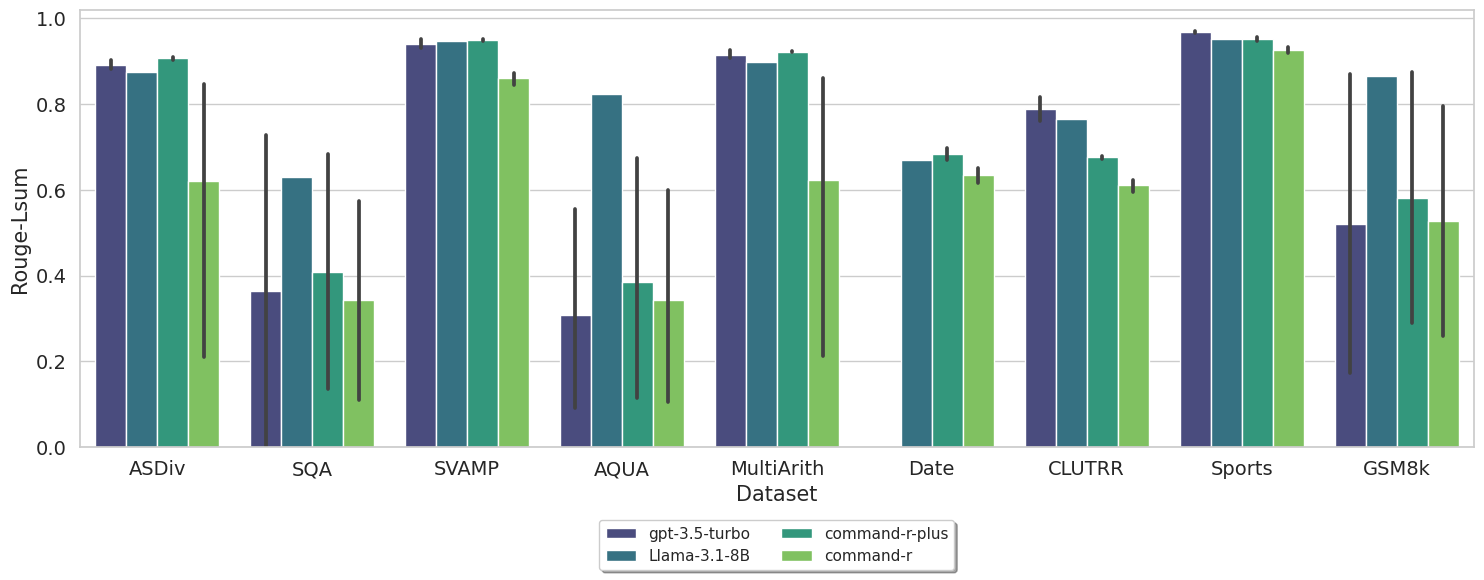

In [18]:
#plot model accuracy per dataset

sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 1, figsize=(15,6))

sns.barplot(x='dataset', y='rougeLsum', hue='model', data=full_results, ax=axs, palette='viridis')
# axs.set_title('Model Accuracy by Dataset')
axs.tick_params(axis='x', rotation=0)

#legend outside the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)

#ylabel
plt.ylabel("Rouge-Lsum", fontsize=15)
plt.xlabel("Dataset", fontsize=15)

#yticks
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

#save the plot
plt.savefig(f'model_faithfulness_by_dataset.pdf')

plt.tight_layout()
plt.show()



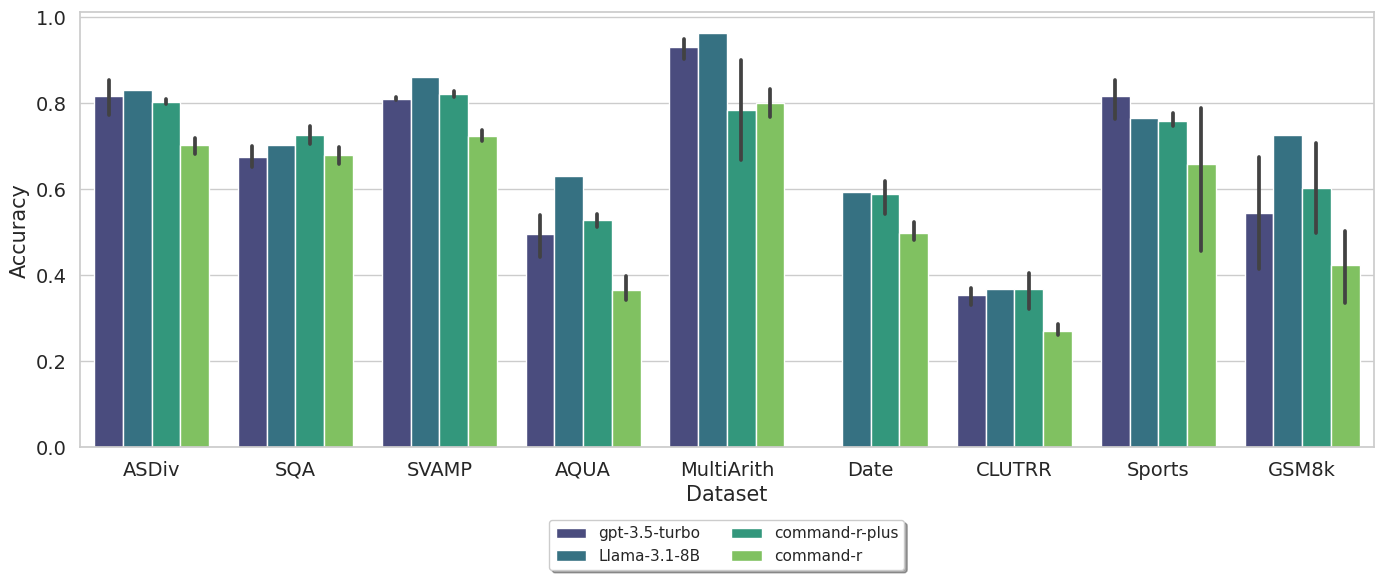

In [19]:
#plot model accuracy per dataset

sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 1, figsize=(14, 6))

sns.barplot(x='dataset', y='Accuracy', hue='model', data=full_results, ax=axs, palette='viridis')
# axs.set_title('Model Accuracy by Dataset')
axs.tick_params(axis='x', rotation=0)

#legend outside the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)

#ylabel
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("Dataset", fontsize=15)

#yticks
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

#save the plot
plt.savefig(f'model_accuracy_by_dataset.pdf')

plt.tight_layout()
plt.show()



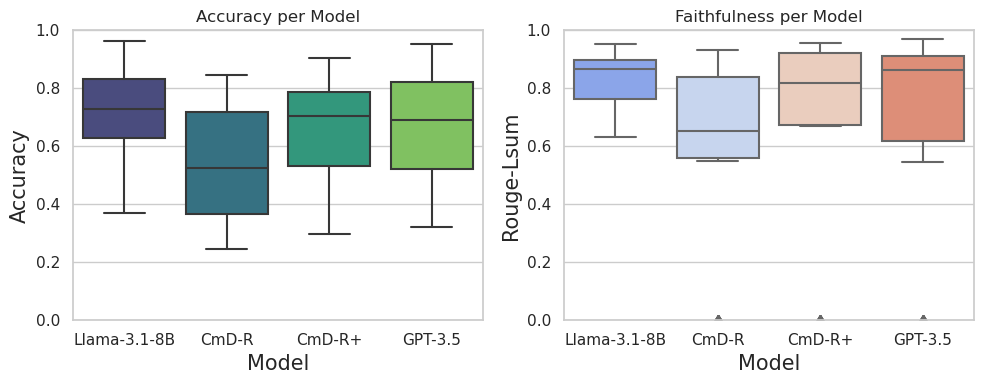

In [56]:
sns.set(style="whitegrid")

#chanege command-r-plus to CmD-R+ and gpt-3.5-turbo to GPT-3.5 and command-r to CmD-R
full_results["model"] = full_results["model"].replace("command-r-plus", "CmD-R+")
full_results["model"] = full_results["model"].replace("gpt-3.5-turbo", "GPT-3.5")
full_results["model"] = full_results["model"].replace("command-r", "CmD-R")

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

#sort the dataframe by num_parameters
full_results = full_results.sort_values(by=['num_parameters'])

# Accuracy Plot
sns.boxplot(x='model', y='Accuracy', data=full_results, ax=axs[0], palette='viridis')
axs[0].set_title('Accuracy per Model')
axs[0].tick_params(axis='x', rotation=0)
axs[0].set_ylim(0, 1)
#fontsize
axs[0].set_xlabel("Model", fontsize=15)
axs[0].set_ylabel("Accuracy", fontsize=15)
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=11)


# RougeLsum Plot
sns.boxplot(x='model', y='rougeLsum', data=full_results, ax=axs[1], palette='coolwarm')
axs[1].set_title('Faithfulness per Model')
axs[1].tick_params(axis='x', rotation=0)
axs[1].set_ylim(0, 1)
#fontsize
axs[1].set_xlabel("Model", fontsize=15)
axs[1].set_ylabel("Rouge-Lsum", fontsize=15)
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=11)



#save the plot trim whitespace

plt.savefig(f'effect_of_scale.pdf', bbox_inches='tight')

plt.tight_layout()

plt.show()




# Faithfulness vs Accuracy

In [21]:
#create bins for rougeLsum
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = [f"{i}-{j}" for i, j in zip(bins[:-1], bins[1:])]
full_results['rougeLsum_bins'] = pd.cut(full_results['rougeLsum'], bins=bins, labels=labels)

full_results

,Unnamed: 0,Accuracy,model,execmode,prompt,icl,rougeLsum,dataset,num_parameters,rougeLsum_bins
0,model=Meta-Llama-3.1-8B-Instruct-Turbo_execmod...,0.963087,Llama-3.1-8B,trace,standard,8,0.897591,MultiArith,8,0.8-0.9
0,model=Meta-Llama-3.1-8B-Instruct-Turbo_execmod...,0.629921,Llama-3.1-8B,trace,standard,6,0.823605,AQUA,8,0.8-0.9
0,model=Meta-Llama-3.1-8B-Instruct-Turbo_execmod...,0.860000,Llama-3.1-8B,trace,standard,8,0.946994,SVAMP,8,0.9-1
2,model=Meta-Llama-3.1-8B-Instruct-Turbo_execmod...,0.593315,Llama-3.1-8B,trace,standard,9,0.668516,Date,8,0.6-0.7
3,model=Meta-Llama-3.1-8B-Instruct-Turbo_execmod...,0.368522,Llama-3.1-8B,trace,standard,8,0.764335,CLUTRR,8,0.7-0.8
...,...,...,...,...,...,...,...,...,...,...
4,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.367562,gpt-3.5-turbo,trace,standard,4,0.777295,CLUTRR,175,0.7-0.8
6,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.357965,gpt-3.5-turbo,trace,standard,6,0.803811,CLUTRR,175,0.8-0.9
7,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.320537,gpt-3.5-turbo,trace,standard,2,0.745049,CLUTRR,175,0.7-0.8
1,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.835210,gpt-3.5-turbo,trace,standard,8,0.967194,Sports,175,0.9-1


In [22]:
#reindex full_results
full_results = full_results.reset_index(drop=True)

Plotting for all datasets
['Llama-3.1-8B', 'command-r', 'command-r-plus', 'gpt-3.5-turbo', 'Llama-3.1-8B', 'command-r', 'command-r-plus', 'gpt-3.5-turbo', 'Mean Accuracy per bin']
[<matplotlib.patches.Rectangle object at 0x79b3f25c8050>, <matplotlib.patches.Rectangle object at 0x79b3f5198710>, <matplotlib.patches.Rectangle object at 0x79b3f4959c90>, <matplotlib.patches.Rectangle object at 0x79b3f495a790>, <matplotlib.collections.PathCollection object at 0x79b3fc1ab1d0>, <matplotlib.collections.PathCollection object at 0x79b3fc1da250>, <matplotlib.collections.PathCollection object at 0x79b3fc1d8150>, <matplotlib.collections.PathCollection object at 0x79b3fc1da590>, <matplotlib.lines.Line2D object at 0x79b3f52f9e10>]


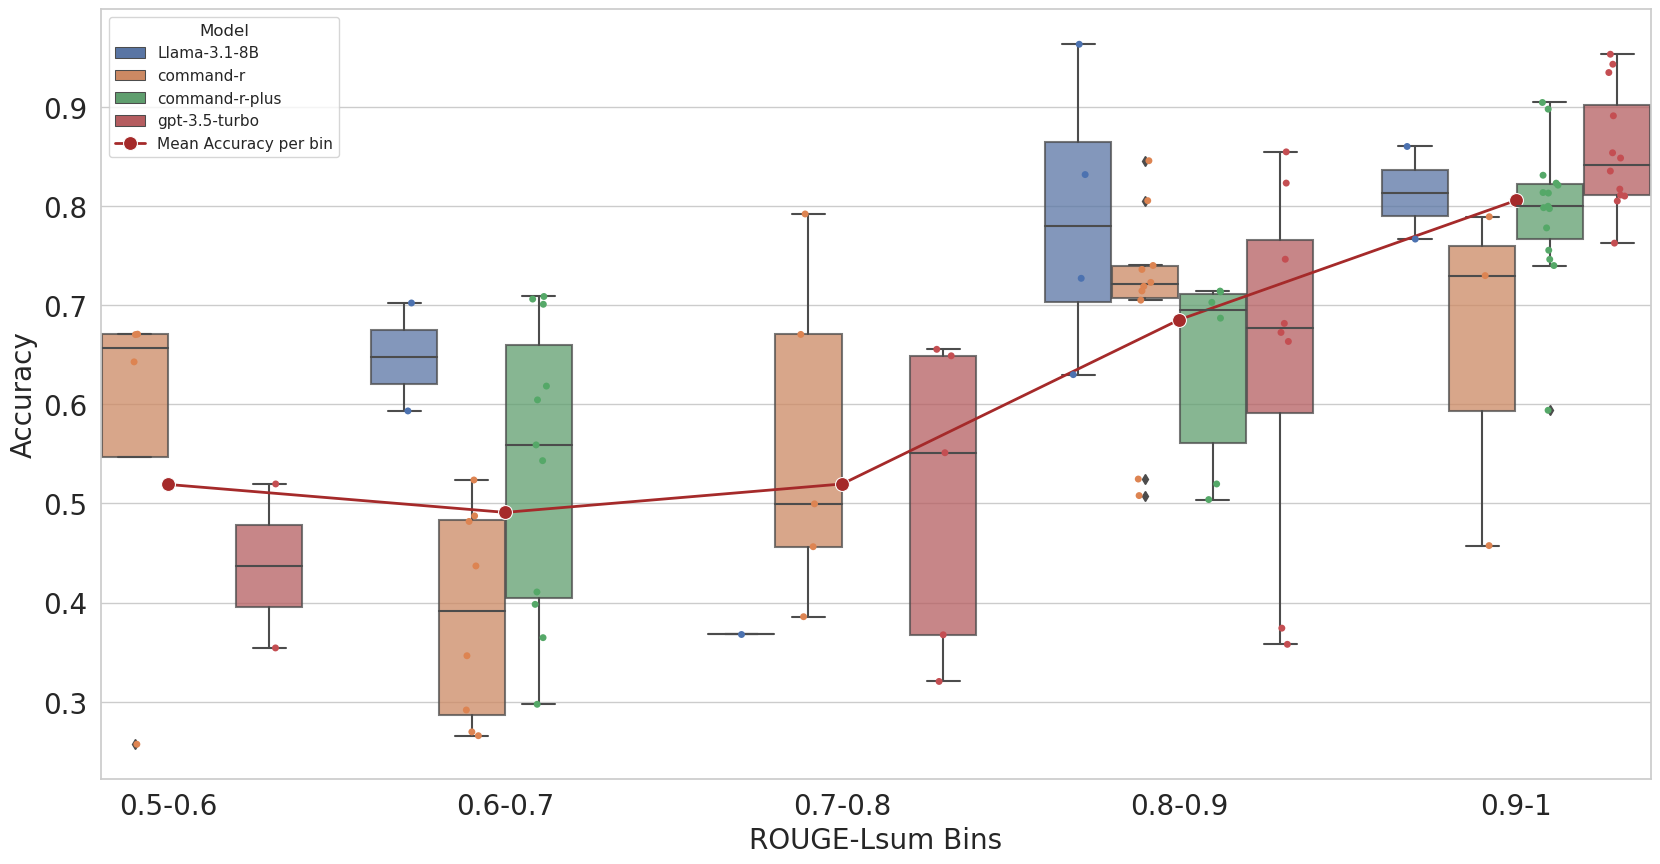

| model          |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |    0.5-0.6 |    0.6-0.7 |    0.7-0.8 |   0.8-0.9 |    0.9-1 |
|:---------------|--------:|----------:|----------:|----------:|----------:|-----------:|-----------:|-----------:|----------:|---------:|
| Llama-3.1-8B   |     nan |       nan |       nan |       nan |       nan | nan        |   0.647749 |   0.368522 |  0.787935 | 0.813316 |
| command-r      |     nan |       nan |       nan |       nan |       nan |   0.56026  |   0.38797  |   0.560856 |  0.70209  | 0.65882  |
| command-r-plus |     nan |       nan |       nan |       nan |       nan | nan        |   0.537455 | nan        |  0.640151 | 0.794147 |
| gpt-3.5-turbo  |     nan |       nan |       nan |       nan |       nan |   0.437008 | nan        |   0.50873  |  0.646703 | 0.855351 |
Plotting for all datasets


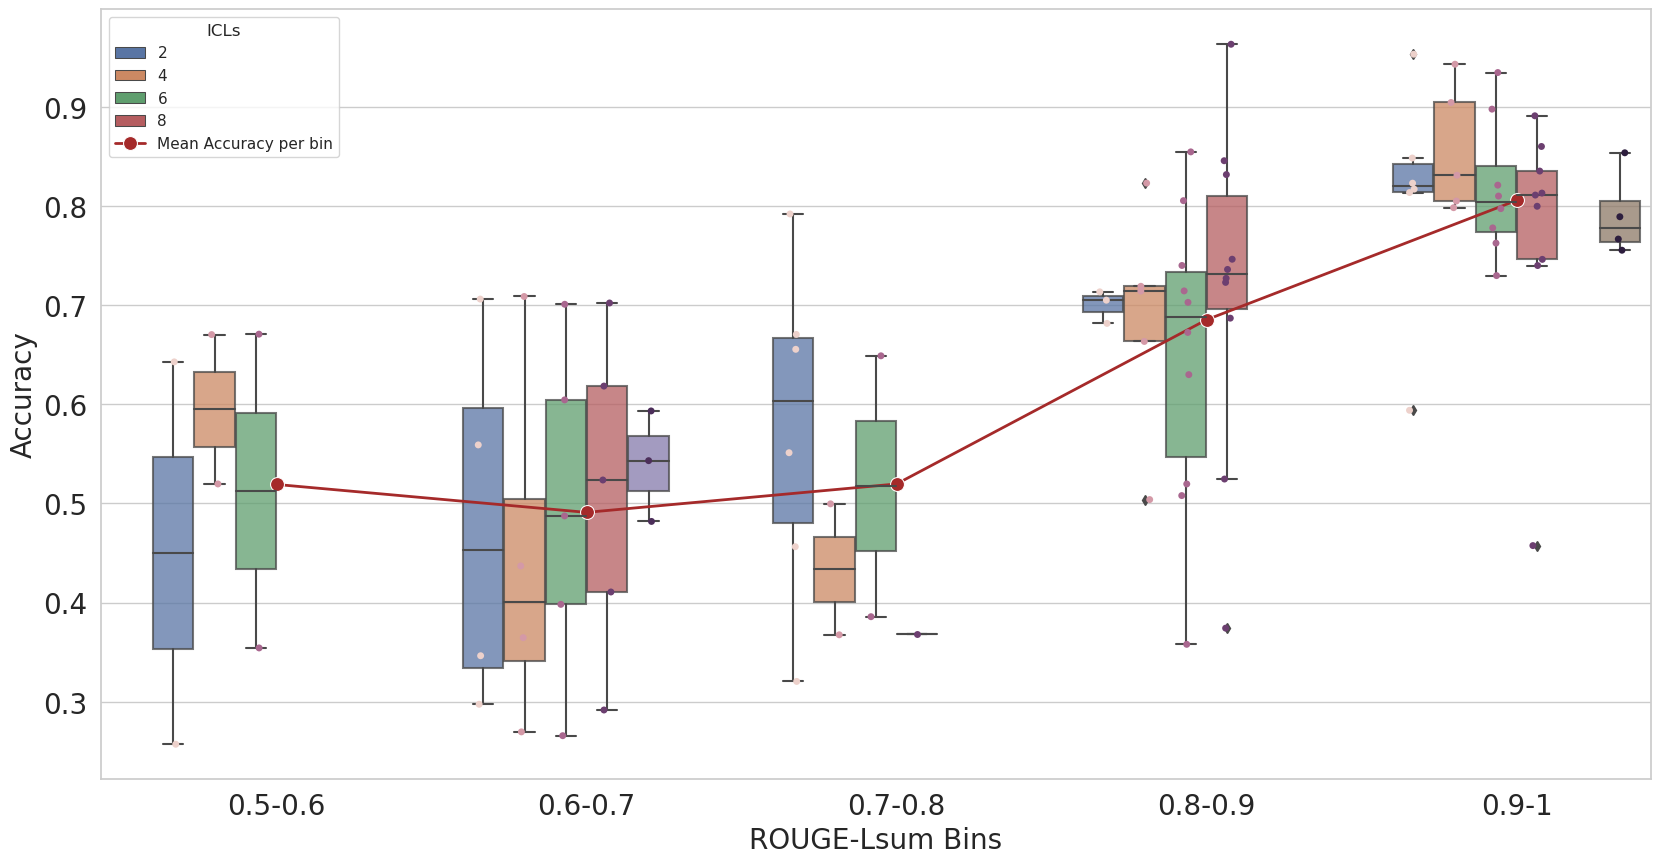

|   icl |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |    0.5-0.6 |    0.6-0.7 |    0.7-0.8 |    0.8-0.9 |      0.9-1 |
|------:|--------:|----------:|----------:|----------:|----------:|-----------:|-----------:|-----------:|-----------:|-----------:|
|     2 |     nan |       nan |       nan |       nan |       nan |   0.449996 |   0.477283 |   0.574335 |   0.699999 |   0.808146 |
|     4 |     nan |       nan |       nan |       nan |       nan |   0.594995 |   0.445025 |   0.433592 |   0.684715 |   0.85632  |
|     6 |     nan |       nan |       nan |       nan |       nan |   0.512537 |   0.491381 |   0.517368 |   0.650509 |   0.816345 |
|     8 |     nan |       nan |       nan |       nan |       nan | nan        |   0.509348 |   0.368522 |   0.71585  |   0.772609 |
|     9 |     nan |       nan |       nan |       nan |       nan | nan        |   0.539461 | nan        | nan        | nan        |
|    10 |     nan |       nan |       nan |       nan |       nan | n

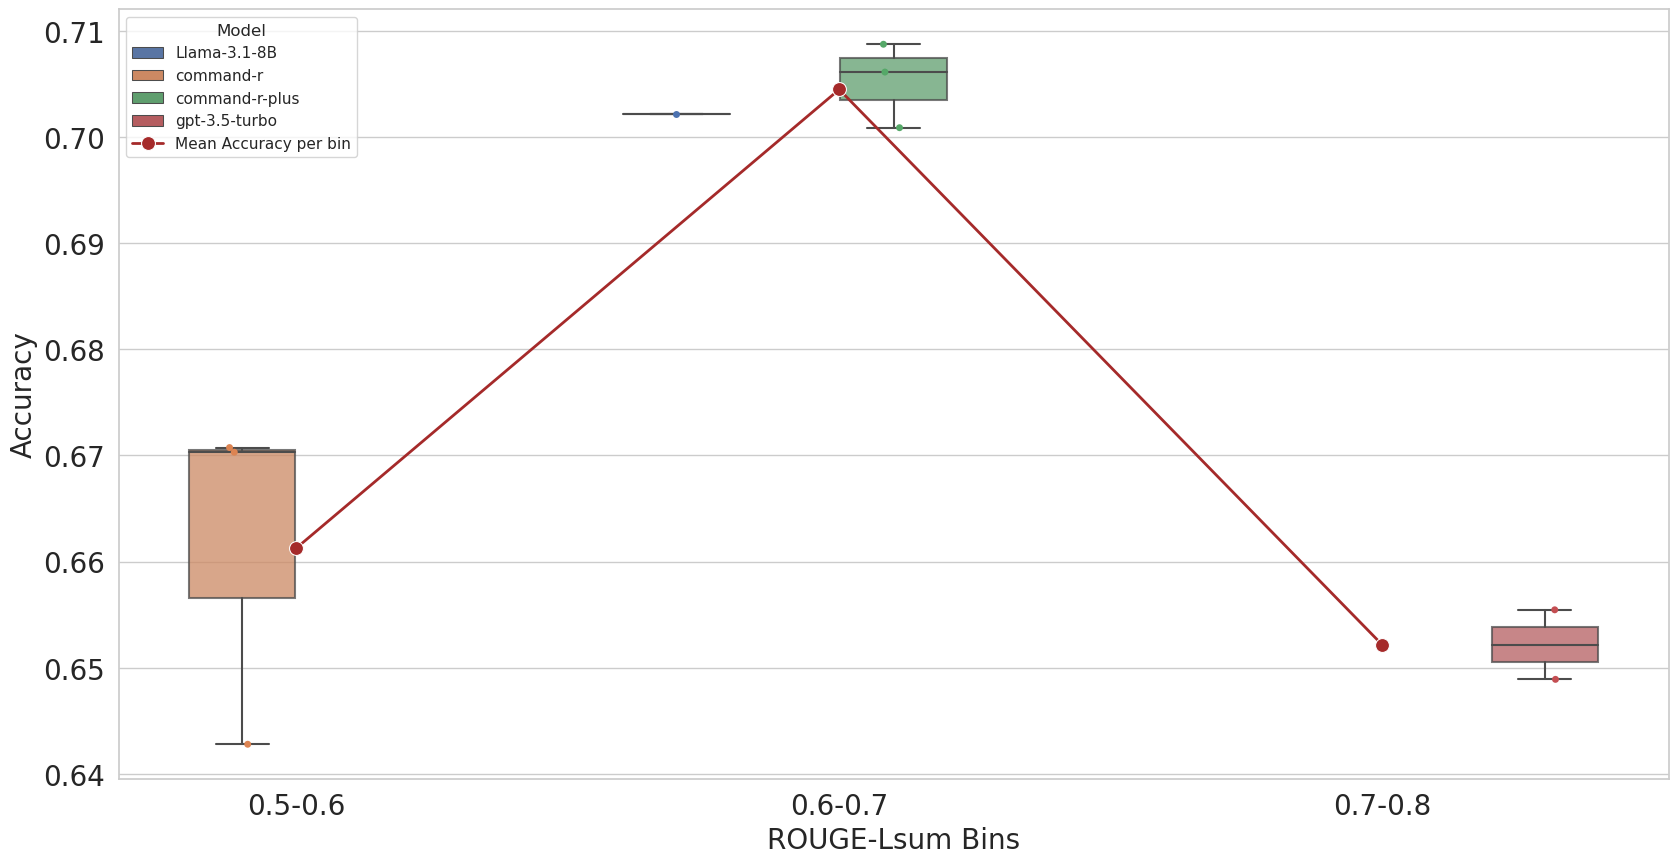

| model          |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |    0.5-0.6 |    0.6-0.7 |    0.7-0.8 |   0.8-0.9 |   0.9-1 |
|:---------------|--------:|----------:|----------:|----------:|----------:|-----------:|-----------:|-----------:|----------:|--------:|
| Llama-3.1-8B   |     nan |       nan |       nan |       nan |       nan | nan        |   0.702183 | nan        |       nan |     nan |
| command-r      |     nan |       nan |       nan |       nan |       nan |   0.661281 | nan        | nan        |       nan |     nan |
| command-r-plus |     nan |       nan |       nan |       nan |       nan | nan        |   0.70524  | nan        |       nan |     nan |
| gpt-3.5-turbo  |     nan |       nan |       nan |       nan |       nan | nan        | nan        |   0.652183 |       nan |     nan |
Plotting for SQA


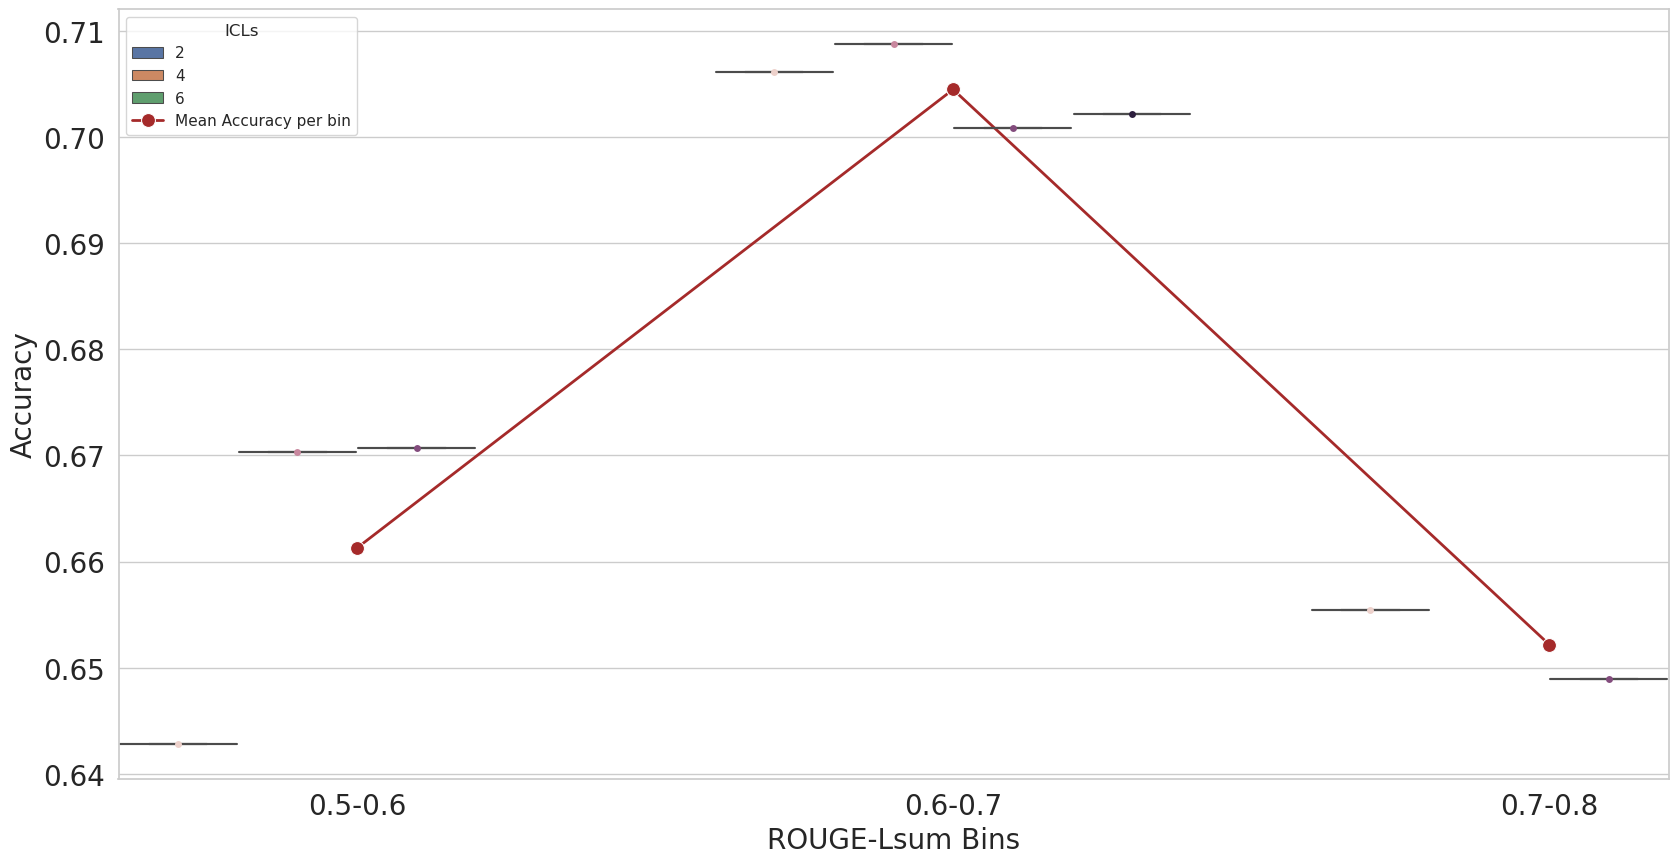

|   icl |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |    0.5-0.6 |   0.6-0.7 |    0.7-0.8 |   0.8-0.9 |   0.9-1 |
|------:|--------:|----------:|----------:|----------:|----------:|-----------:|----------:|-----------:|----------:|--------:|
|     2 |     nan |       nan |       nan |       nan |       nan |   0.642795 |  0.706114 |   0.655459 |       nan |     nan |
|     4 |     nan |       nan |       nan |       nan |       nan |   0.670306 |  0.708734 | nan        |       nan |     nan |
|     6 |     nan |       nan |       nan |       nan |       nan |   0.670742 |  0.700873 |   0.648908 |       nan |     nan |
|     8 |     nan |       nan |       nan |       nan |       nan | nan        |  0.702183 | nan        |       nan |     nan |
____________________________________________________________________________________________________
Plotting for MultiArith
['Llama-3.1-8B', 'command-r', 'command-r-plus', 'gpt-3.5-turbo', 'Llama-3.1-8B', 'command-r', 'command-r-pl

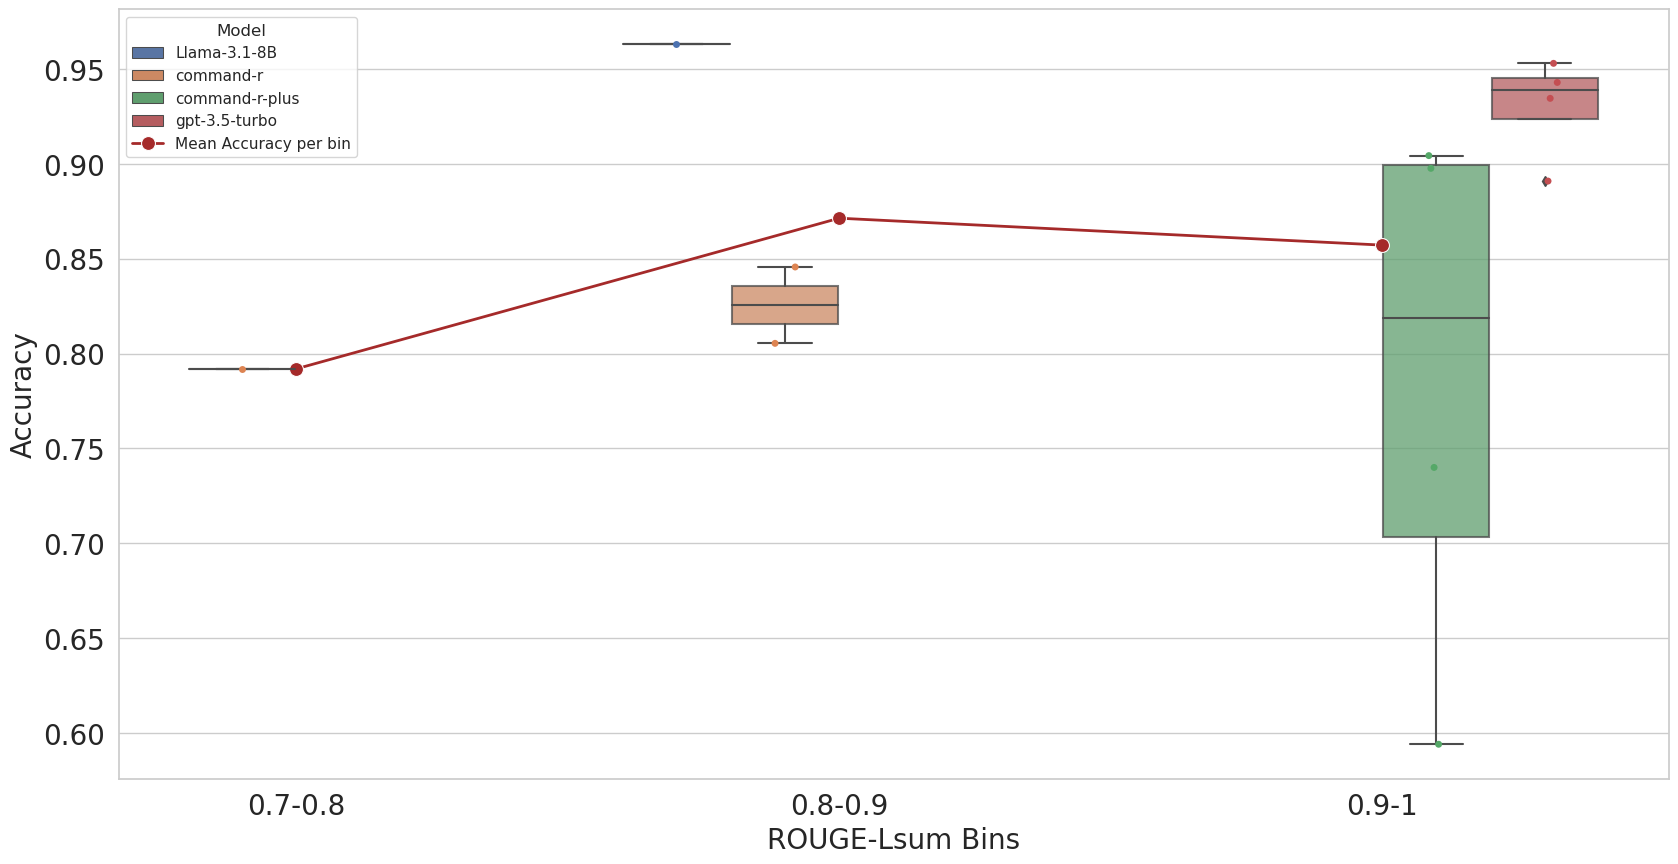

| model          |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |   0.5-0.6 |   0.6-0.7 |    0.7-0.8 |    0.8-0.9 |      0.9-1 |
|:---------------|--------:|----------:|----------:|----------:|----------:|----------:|----------:|-----------:|-----------:|-----------:|
| Llama-3.1-8B   |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        |   0.963087 | nan        |
| command-r      |     nan |       nan |       nan |       nan |       nan |       nan |       nan |   0.791946 |   0.825503 | nan        |
| command-r-plus |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        | nan        |   0.783977 |
| gpt-3.5-turbo  |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        | nan        |   0.930369 |
Plotting for MultiArith


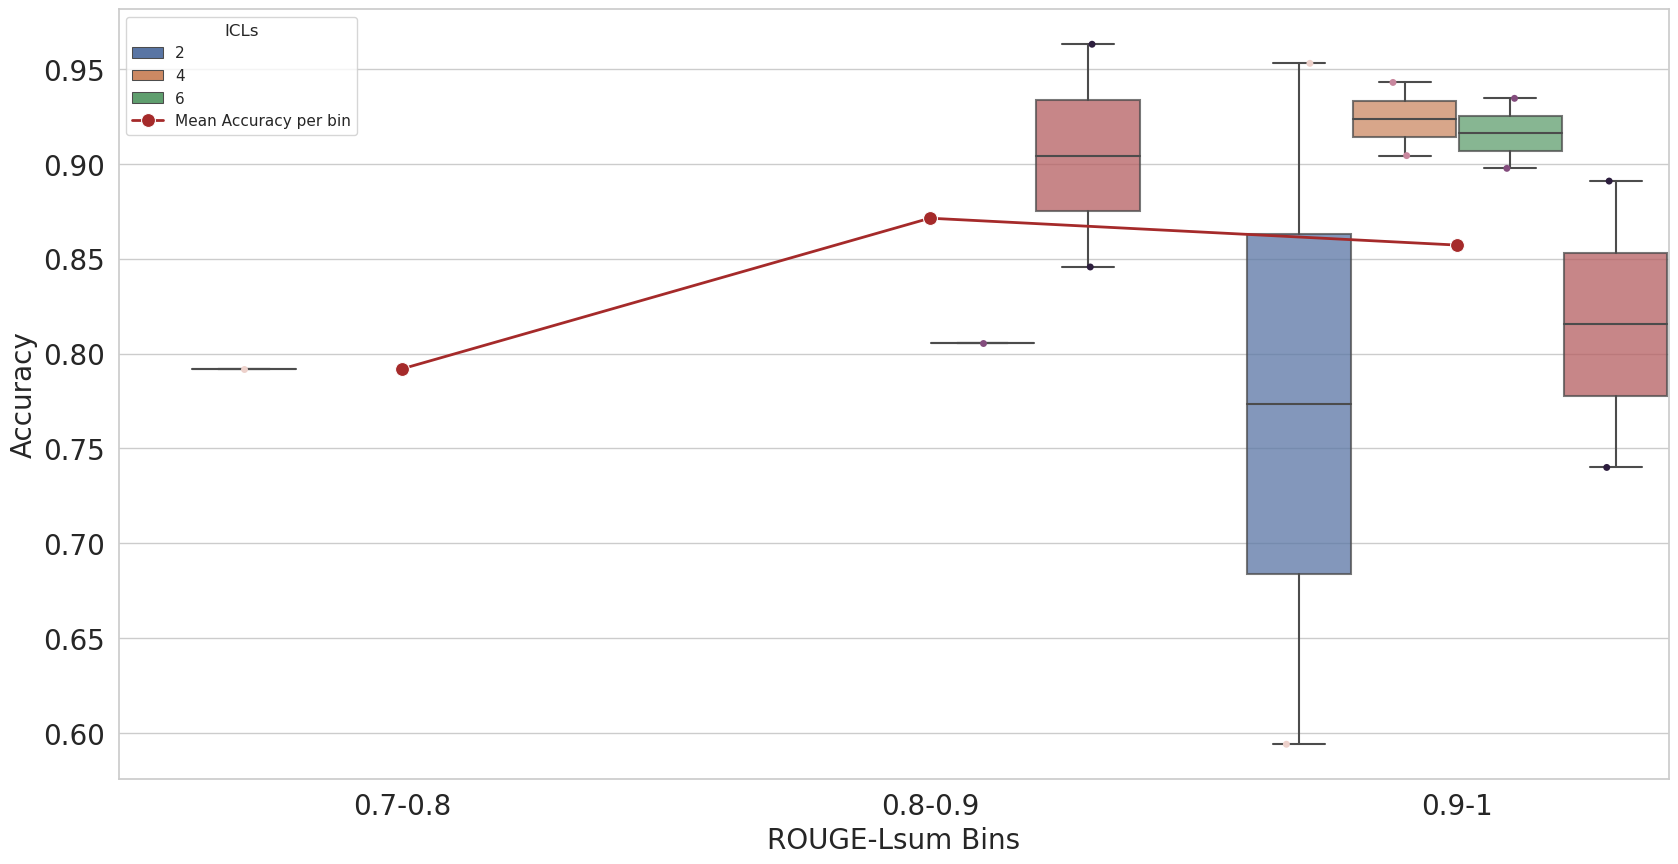

|   icl |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |   0.5-0.6 |   0.6-0.7 |    0.7-0.8 |    0.8-0.9 |    0.9-1 |
|------:|--------:|----------:|----------:|----------:|----------:|----------:|----------:|-----------:|-----------:|---------:|
|     2 |     nan |       nan |       nan |       nan |       nan |       nan |       nan |   0.791946 | nan        | 0.77349  |
|     4 |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        | nan        | 0.923658 |
|     6 |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        |   0.805369 | 0.916107 |
|     8 |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        |   0.904362 | 0.815436 |
____________________________________________________________________________________________________
Plotting for GSM8k
['Llama-3.1-8B', 'command-r', 'command-r-plus', 'gpt-3.5-turbo', 'Llama-3.1-8B', 'command-r', 'command-r-p

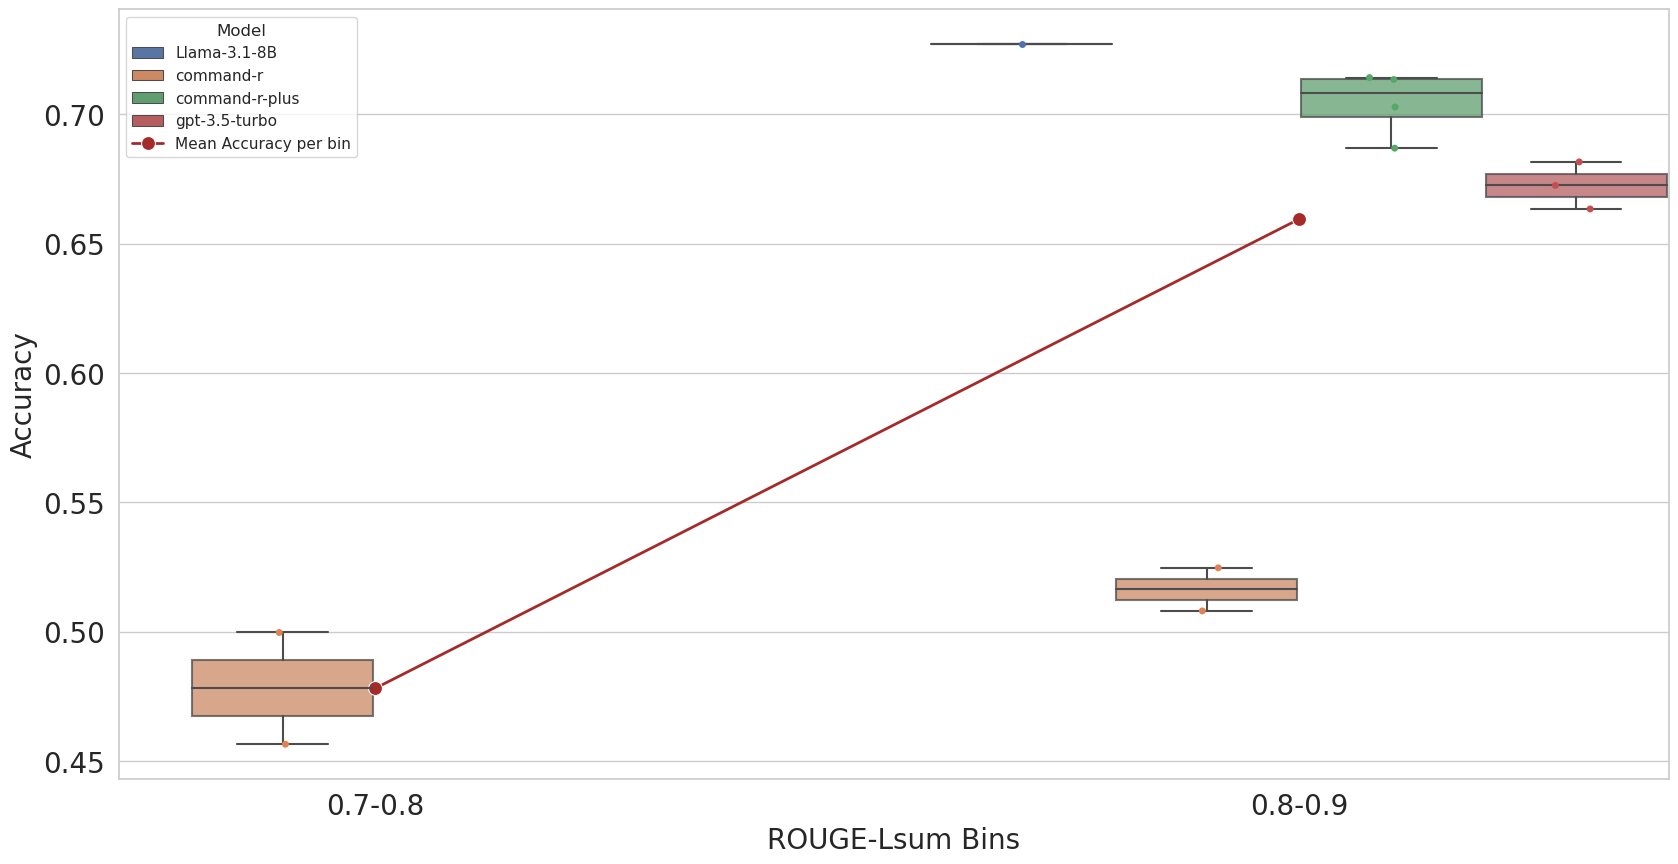

| model          |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |   0.5-0.6 |   0.6-0.7 |    0.7-0.8 |   0.8-0.9 |   0.9-1 |
|:---------------|--------:|----------:|----------:|----------:|----------:|----------:|----------:|-----------:|----------:|--------:|
| Llama-3.1-8B   |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        |  0.727066 |     nan |
| command-r      |     nan |       nan |       nan |       nan |       nan |       nan |       nan |   0.478014 |  0.5163   |     nan |
| command-r-plus |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        |  0.704321 |     nan |
| gpt-3.5-turbo  |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        |  0.672479 |     nan |
Plotting for GSM8k


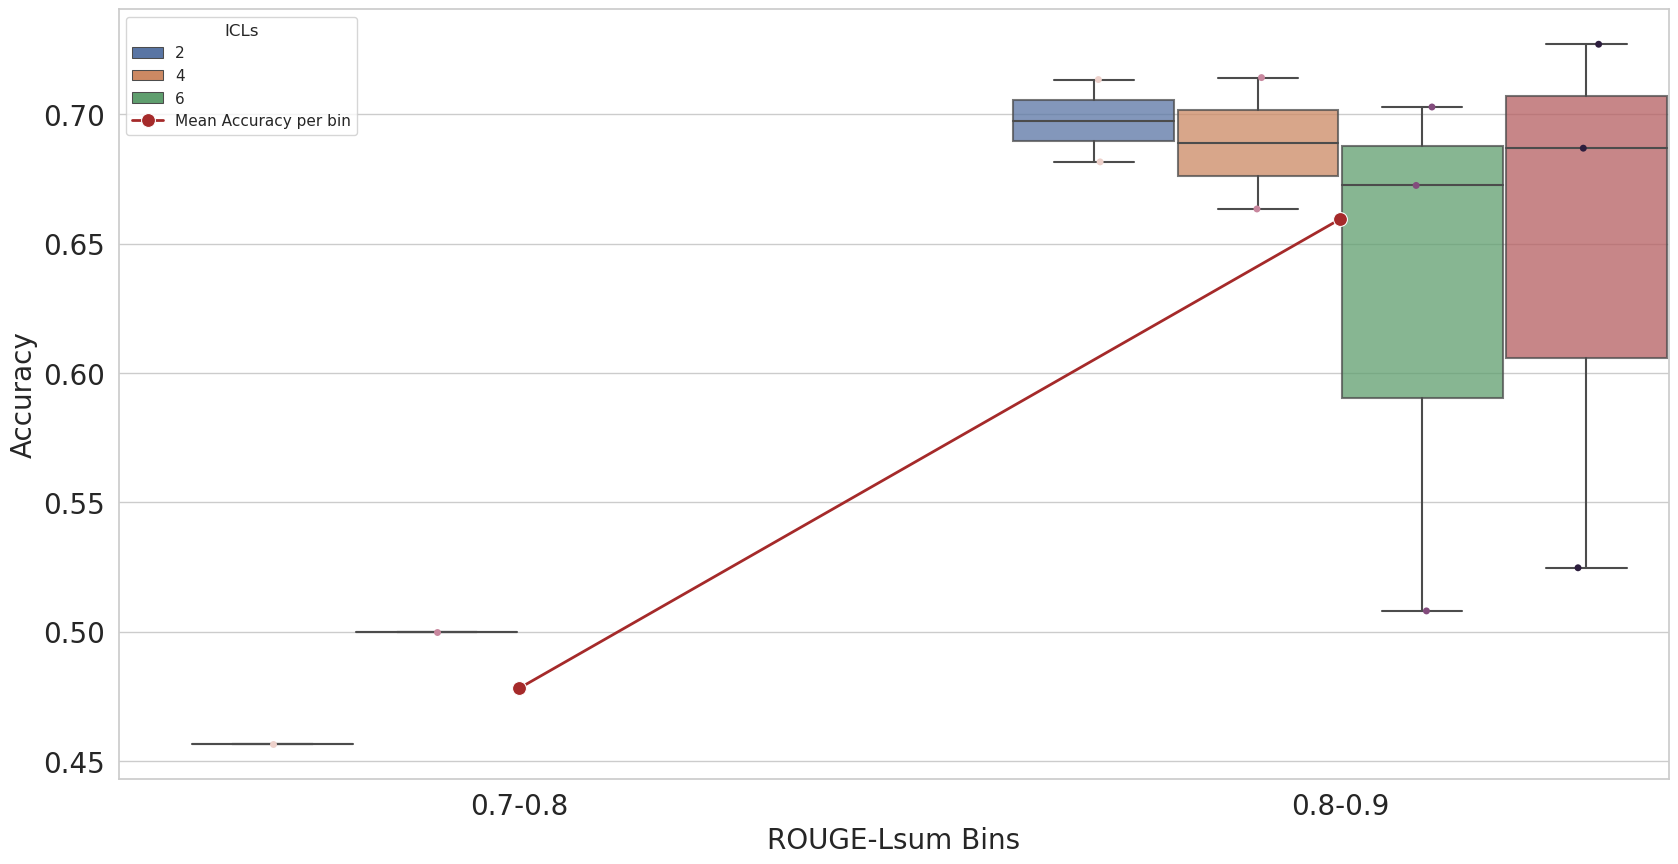

|   icl |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |   0.5-0.6 |   0.6-0.7 |    0.7-0.8 |   0.8-0.9 |   0.9-1 |
|------:|--------:|----------:|----------:|----------:|----------:|----------:|----------:|-----------:|----------:|--------:|
|     2 |     nan |       nan |       nan |       nan |       nan |       nan |       nan |   0.456406 |  0.697498 |     nan |
|     4 |     nan |       nan |       nan |       nan |       nan |       nan |       nan |   0.499621 |  0.688779 |     nan |
|     6 |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        |  0.627748 |     nan |
|     8 |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        |  0.646197 |     nan |
____________________________________________________________________________________________________
Plotting for SVAMP
['Llama-3.1-8B', 'command-r', 'command-r-plus', 'gpt-3.5-turbo', 'Llama-3.1-8B', 'command-r', 'command-r-plus', 'gpt-3

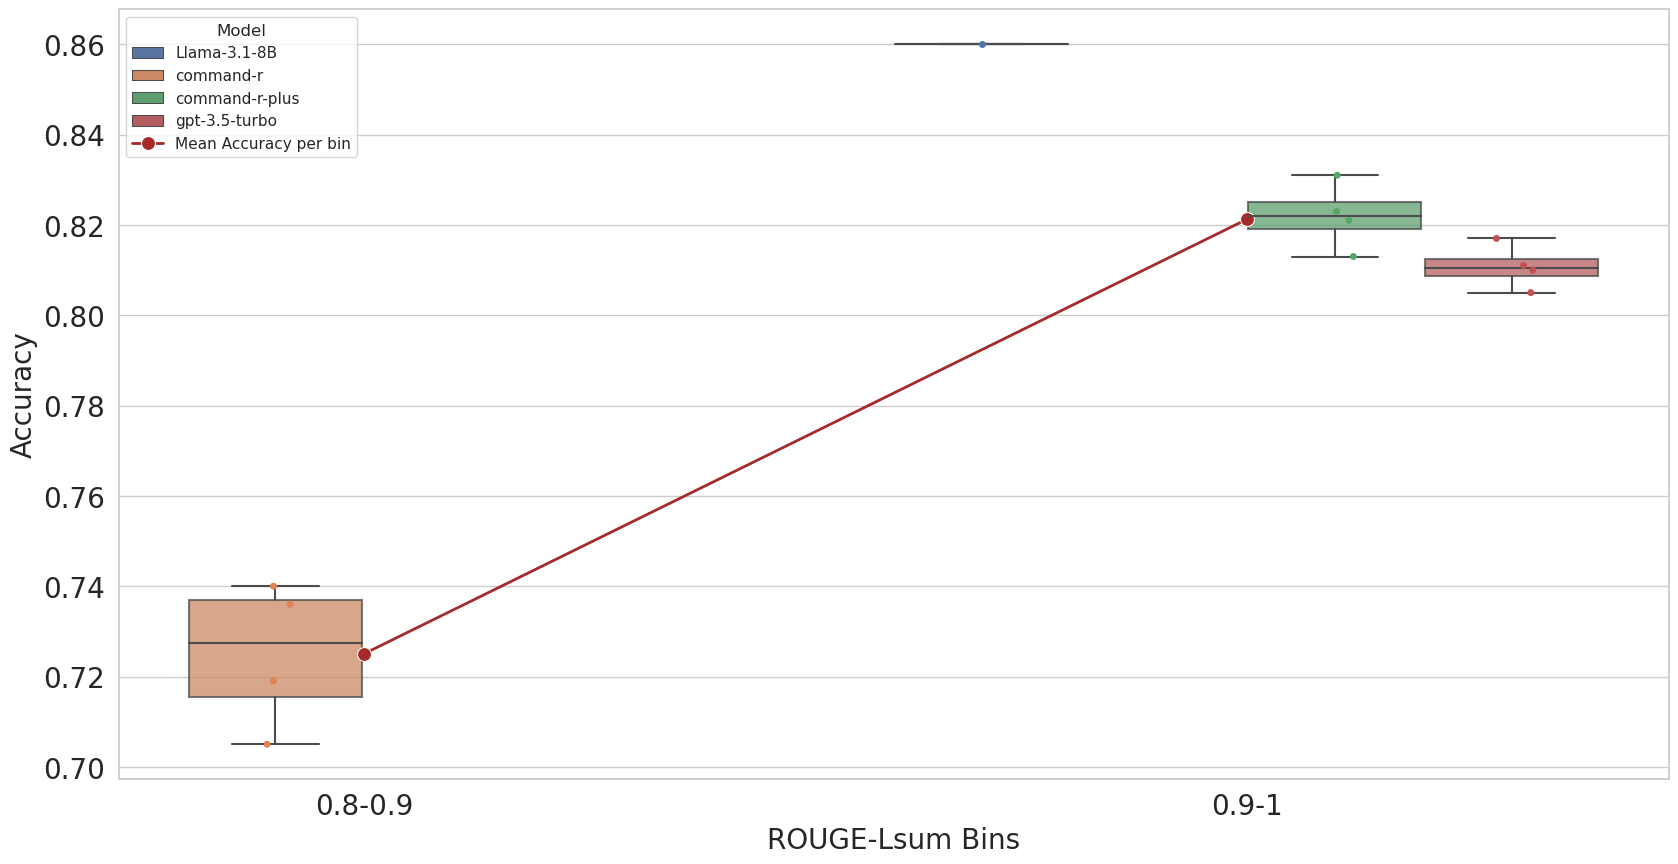

| model          |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |   0.5-0.6 |   0.6-0.7 |   0.7-0.8 |   0.8-0.9 |     0.9-1 |
|:---------------|--------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|
| Llama-3.1-8B   |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |   nan     |   0.86    |
| command-r      |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |     0.725 | nan       |
| command-r-plus |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |   nan     |   0.822   |
| gpt-3.5-turbo  |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |   nan     |   0.81075 |
Plotting for SVAMP


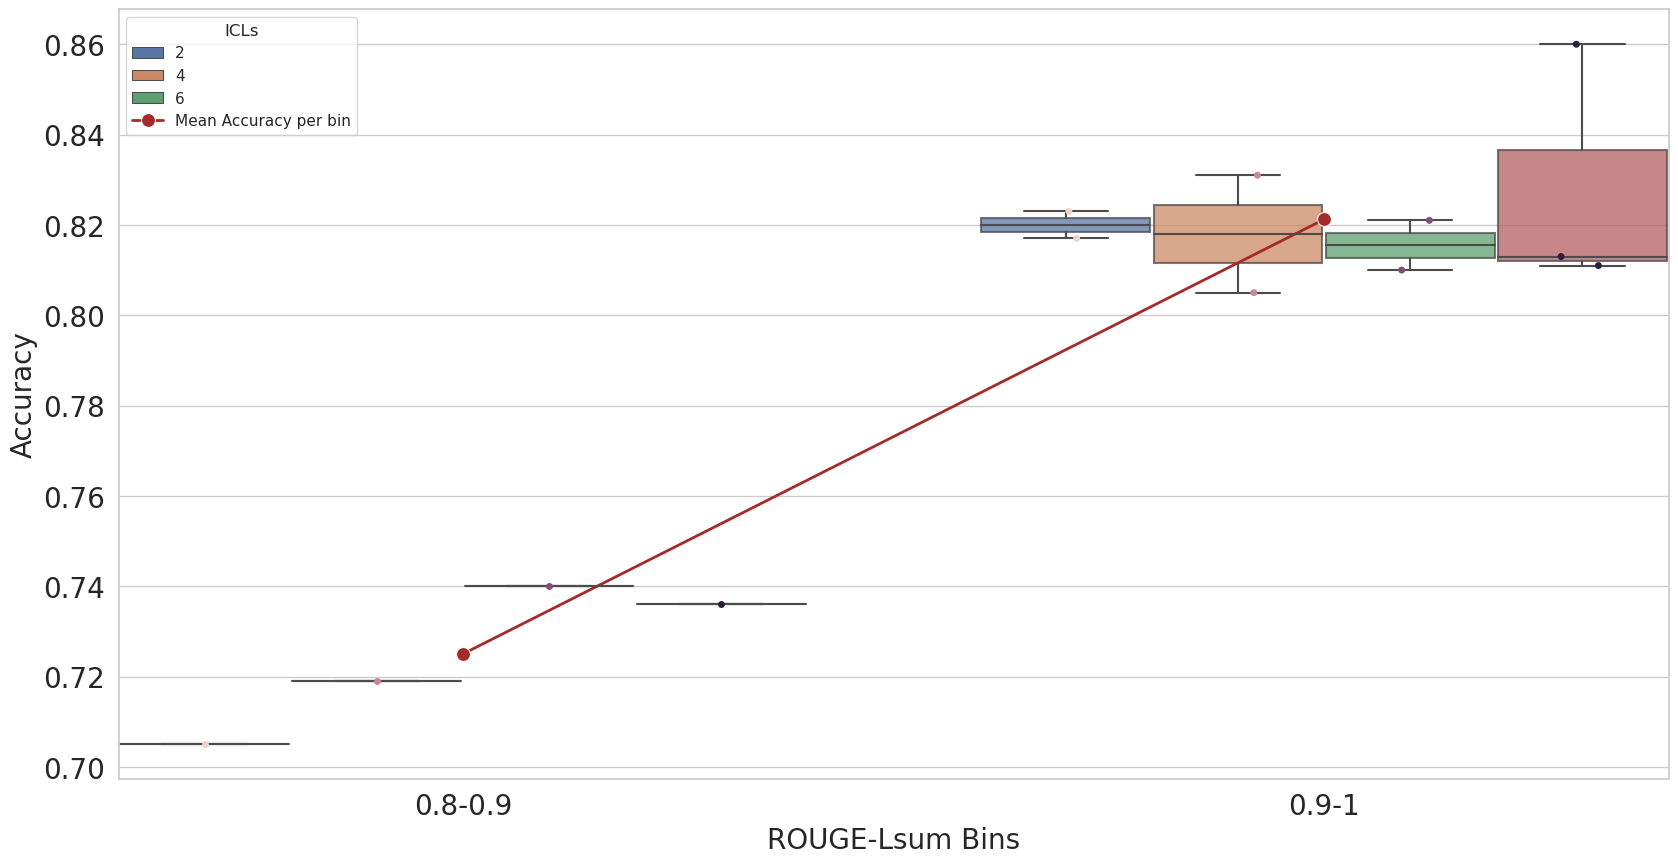

|   icl |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |   0.5-0.6 |   0.6-0.7 |   0.7-0.8 |   0.8-0.9 |   0.9-1 |
|------:|--------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|--------:|
|     2 |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |     0.705 |  0.82   |
|     4 |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |     0.719 |  0.818  |
|     6 |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |     0.74  |  0.8155 |
|     8 |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |     0.736 |  0.828  |
____________________________________________________________________________________________________
Plotting for CLUTRR
['Llama-3.1-8B', 'command-r', 'command-r-plus', 'gpt-3.5-turbo', 'Llama-3.1-8B', 'command-r', 'command-r-plus', 'gpt-3.5-tu

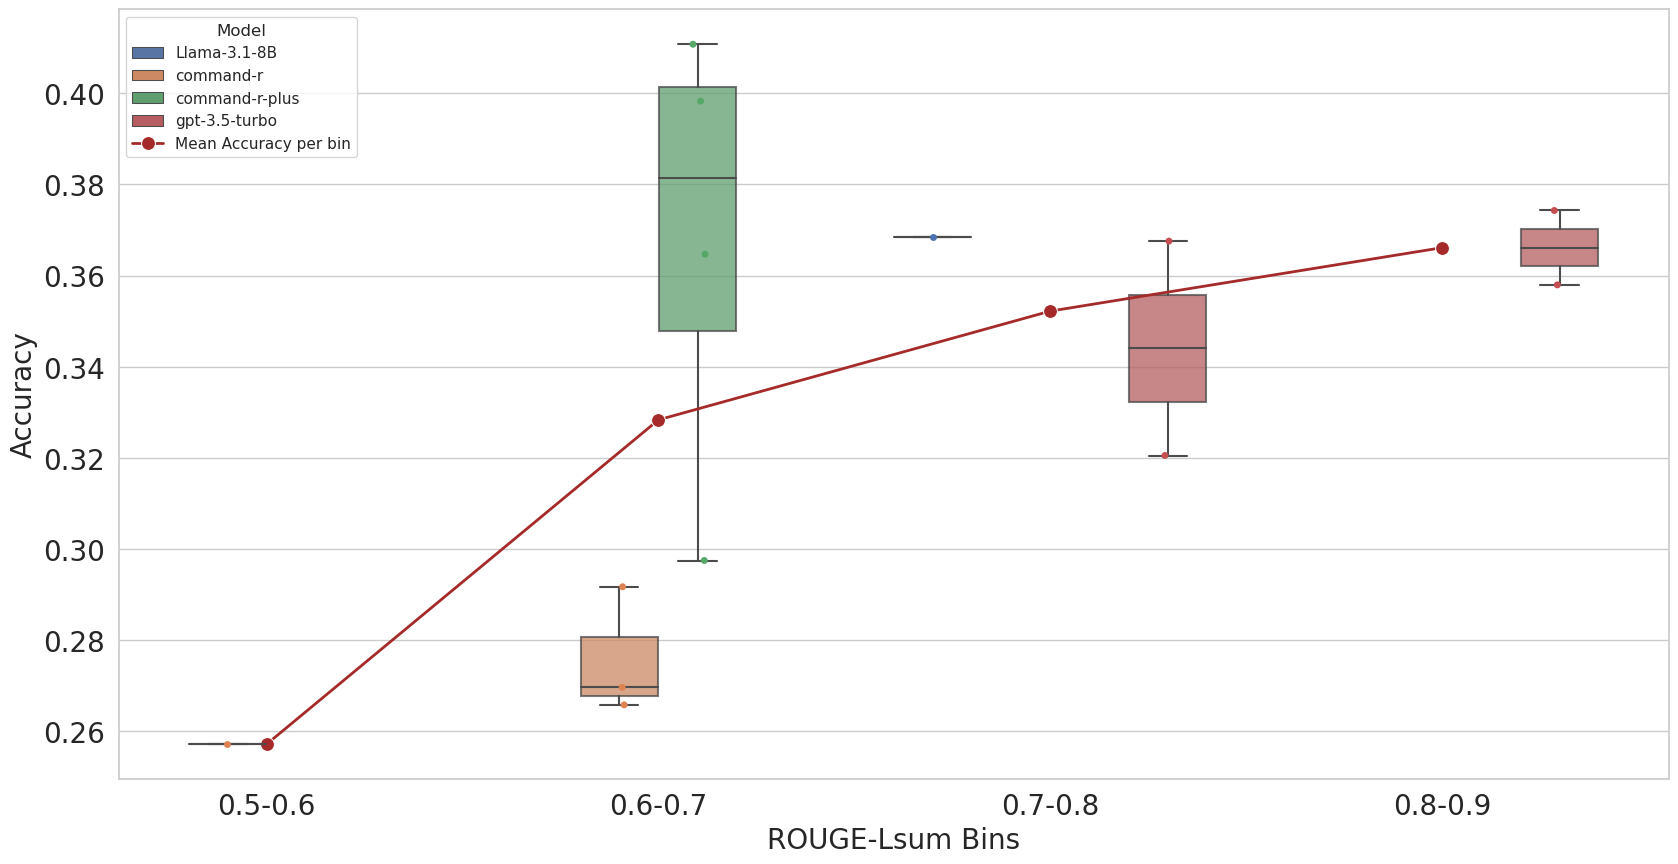

| model          |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |    0.5-0.6 |    0.6-0.7 |    0.7-0.8 |    0.8-0.9 |   0.9-1 |
|:---------------|--------:|----------:|----------:|----------:|----------:|-----------:|-----------:|-----------:|-----------:|--------:|
| Llama-3.1-8B   |     nan |       nan |       nan |       nan |       nan | nan        | nan        |   0.368522 | nan        |     nan |
| command-r      |     nan |       nan |       nan |       nan |       nan |   0.257198 |   0.275752 | nan        | nan        |     nan |
| command-r-plus |     nan |       nan |       nan |       nan |       nan | nan        |   0.367802 | nan        | nan        |     nan |
| gpt-3.5-turbo  |     nan |       nan |       nan |       nan |       nan | nan        | nan        |   0.34405  |   0.366123 |     nan |
Plotting for CLUTRR


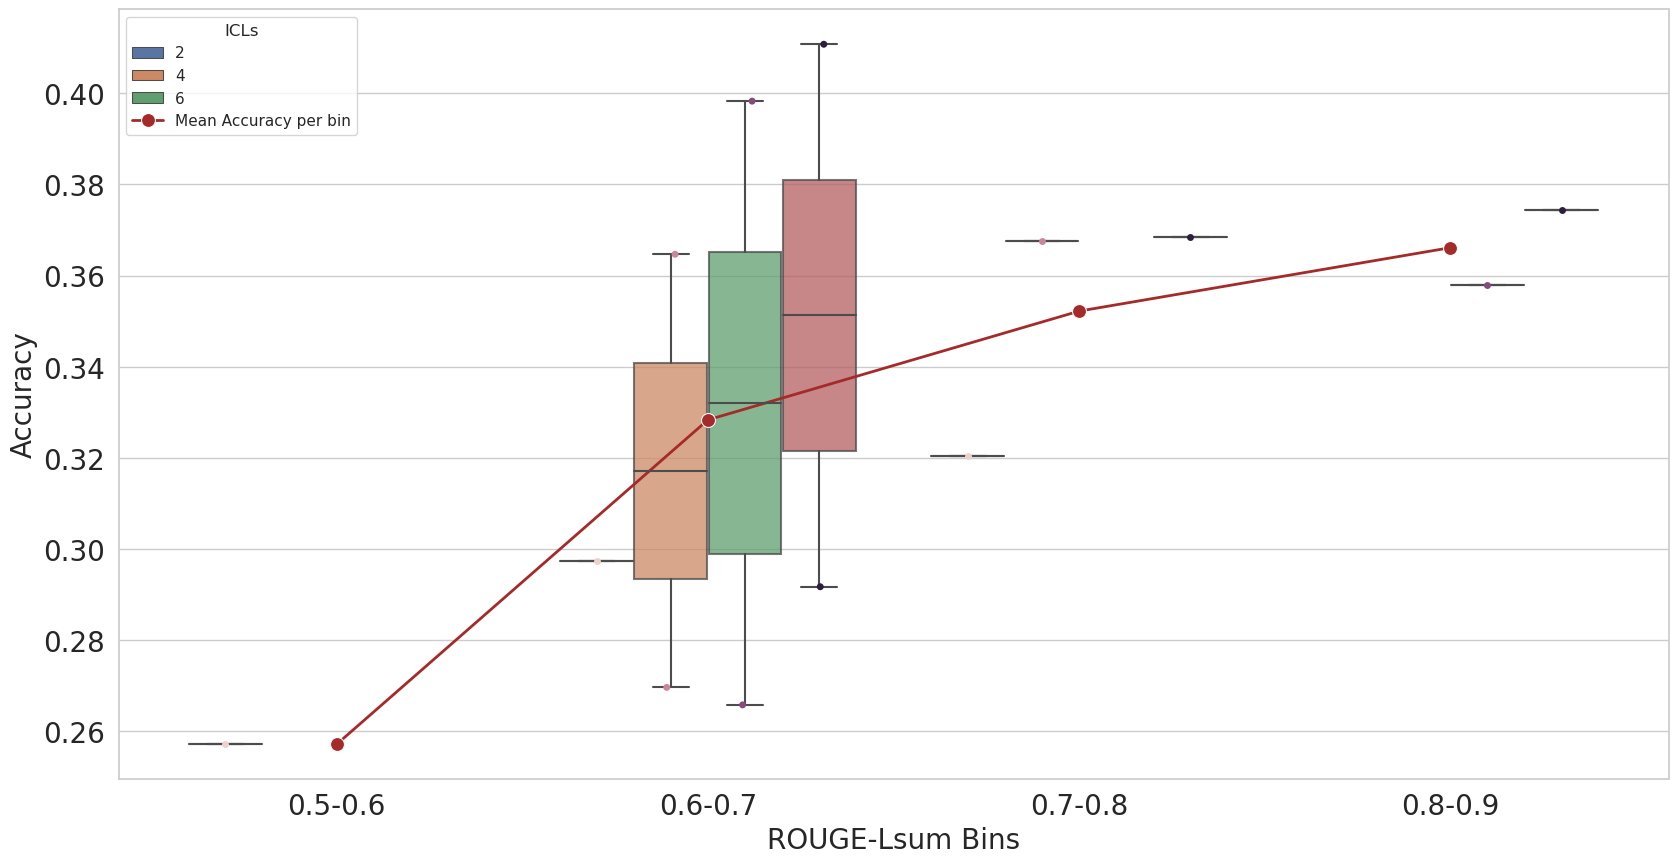

|   icl |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |    0.5-0.6 |   0.6-0.7 |    0.7-0.8 |    0.8-0.9 |   0.9-1 |
|------:|--------:|----------:|----------:|----------:|----------:|-----------:|----------:|-----------:|-----------:|--------:|
|     2 |     nan |       nan |       nan |       nan |       nan |   0.257198 |  0.297505 |   0.320537 | nan        |     nan |
|     4 |     nan |       nan |       nan |       nan |       nan | nan        |  0.317179 |   0.367562 | nan        |     nan |
|     6 |     nan |       nan |       nan |       nan |       nan | nan        |  0.332054 | nan        |   0.357965 |     nan |
|     8 |     nan |       nan |       nan |       nan |       nan | nan        |  0.351248 |   0.368522 |   0.37428  |     nan |
____________________________________________________________________________________________________
Plotting for ASDiv
['Llama-3.1-8B', 'command-r', 'command-r-plus', 'gpt-3.5-turbo', 'Llama-3.1-8B', 'command-r', 'command-r-p

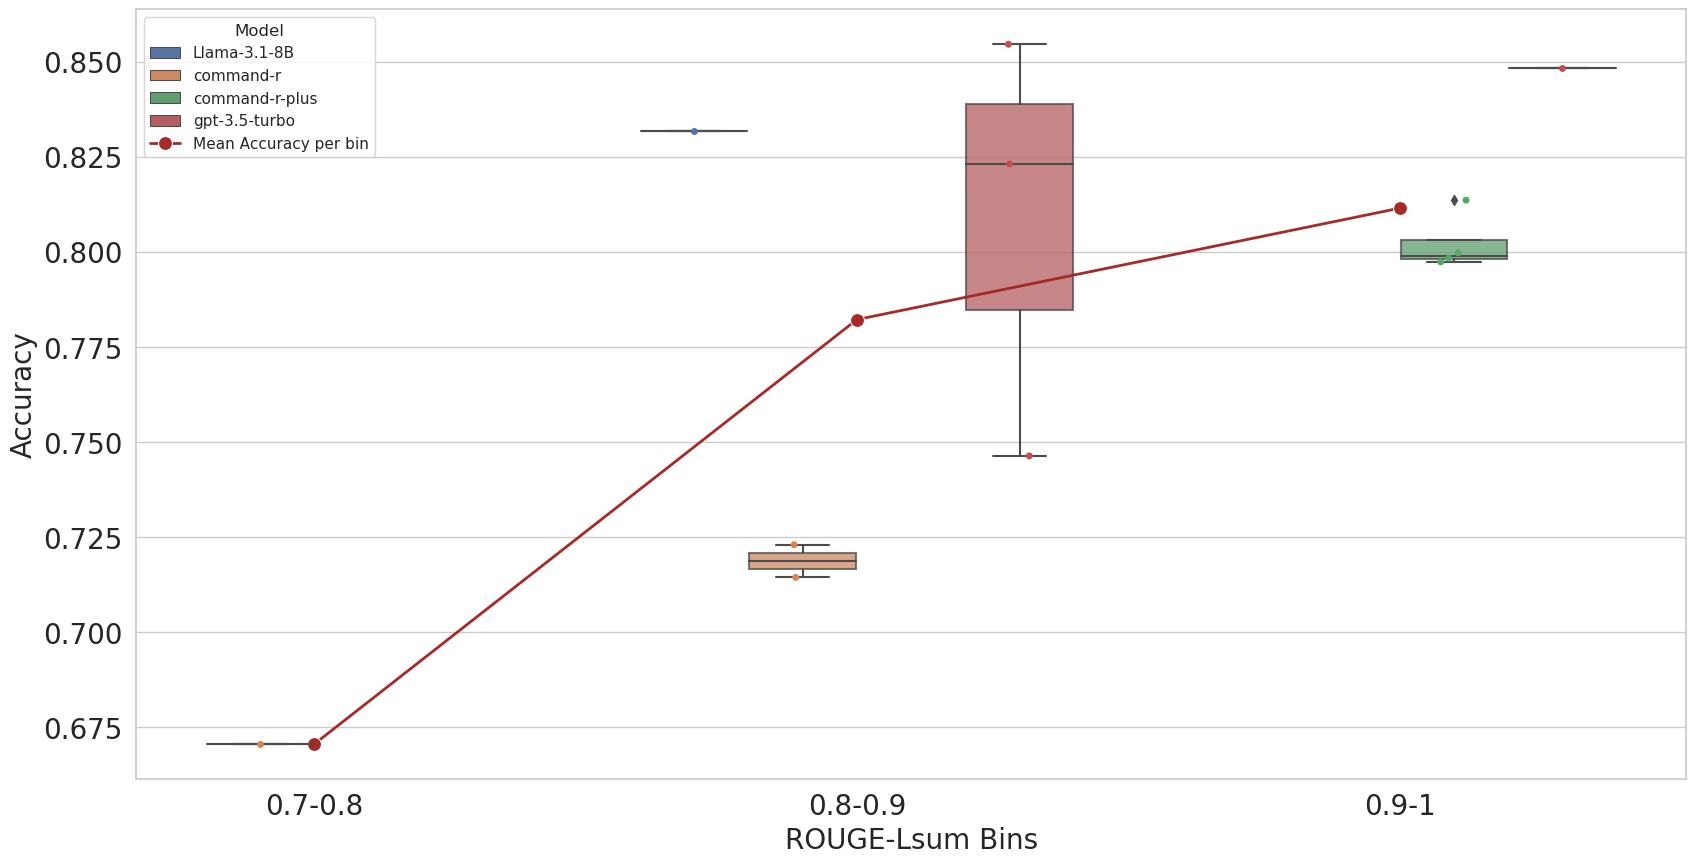

| model          |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |   0.5-0.6 |   0.6-0.7 |    0.7-0.8 |    0.8-0.9 |      0.9-1 |
|:---------------|--------:|----------:|----------:|----------:|----------:|----------:|----------:|-----------:|-----------:|-----------:|
| Llama-3.1-8B   |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        |   0.831664 | nan        |
| command-r      |     nan |       nan |       nan |       nan |       nan |       nan |       nan |   0.670482 |   0.718646 | nan        |
| command-r-plus |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        | nan        |   0.802217 |
| gpt-3.5-turbo  |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        |   0.80798  |   0.848355 |
Plotting for ASDiv


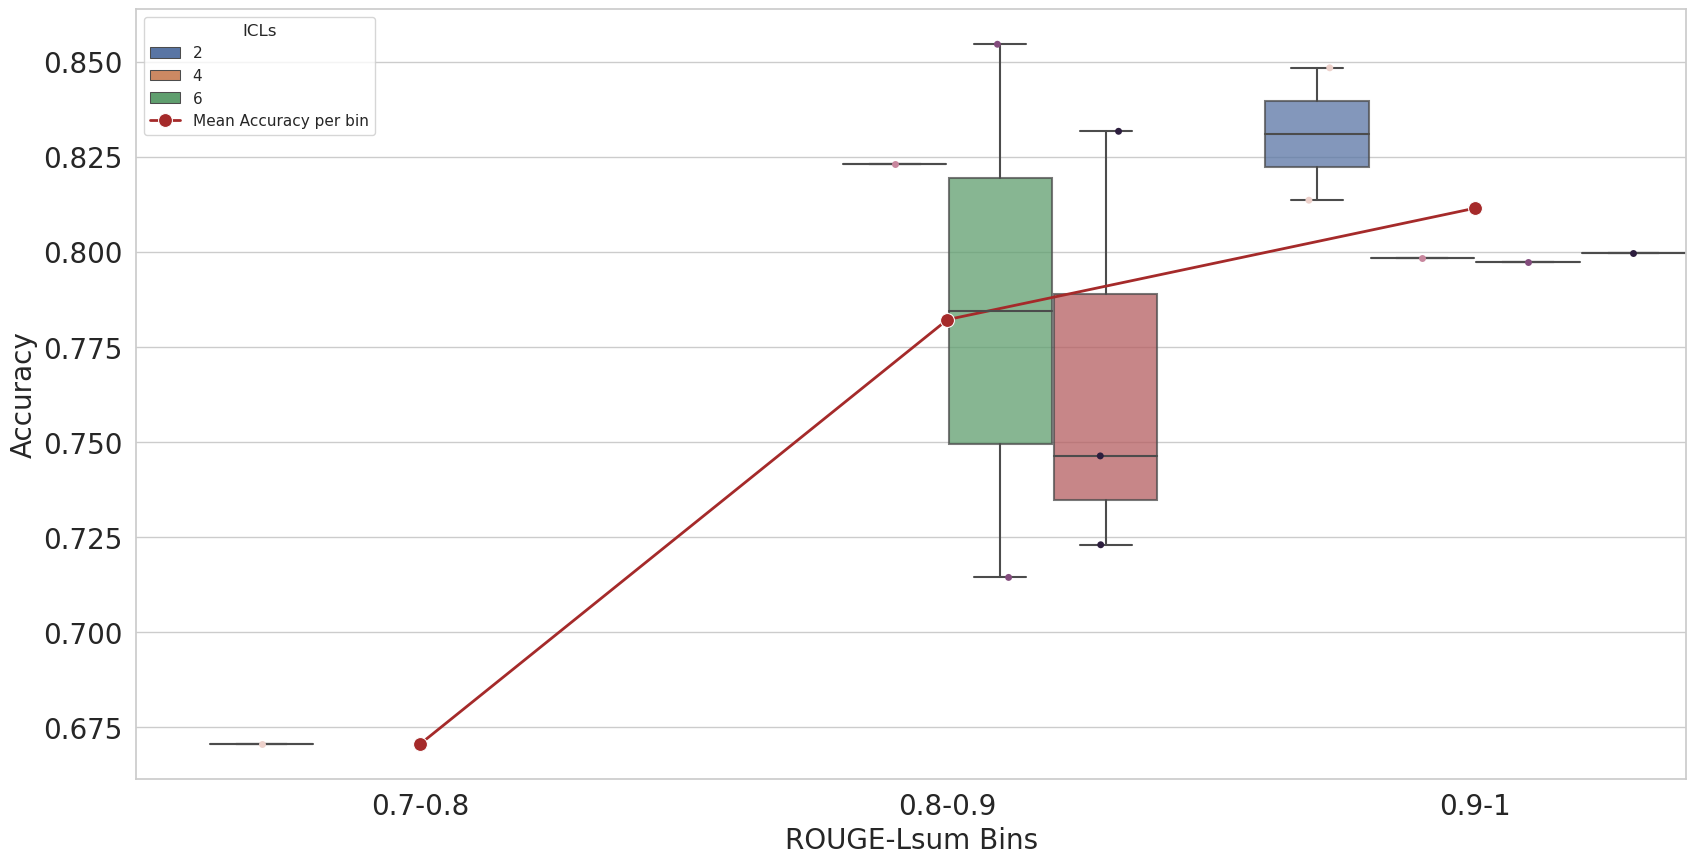

|   icl |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |   0.5-0.6 |   0.6-0.7 |    0.7-0.8 |    0.8-0.9 |    0.9-1 |
|------:|--------:|----------:|----------:|----------:|----------:|----------:|----------:|-----------:|-----------:|---------:|
|     2 |     nan |       nan |       nan |       nan |       nan |       nan |       nan |   0.670482 | nan        | 0.830949 |
|     4 |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        |   0.823081 | 0.798283 |
|     6 |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        |   0.784454 | 0.79733  |
|     8 |     nan |       nan |       nan |       nan |       nan |       nan |       nan | nan        |   0.766969 | 0.799714 |
____________________________________________________________________________________________________
Plotting for AQUA
['Llama-3.1-8B', 'command-r', 'command-r-plus', 'gpt-3.5-turbo', 'Llama-3.1-8B', 'command-r', 'command-r-pl

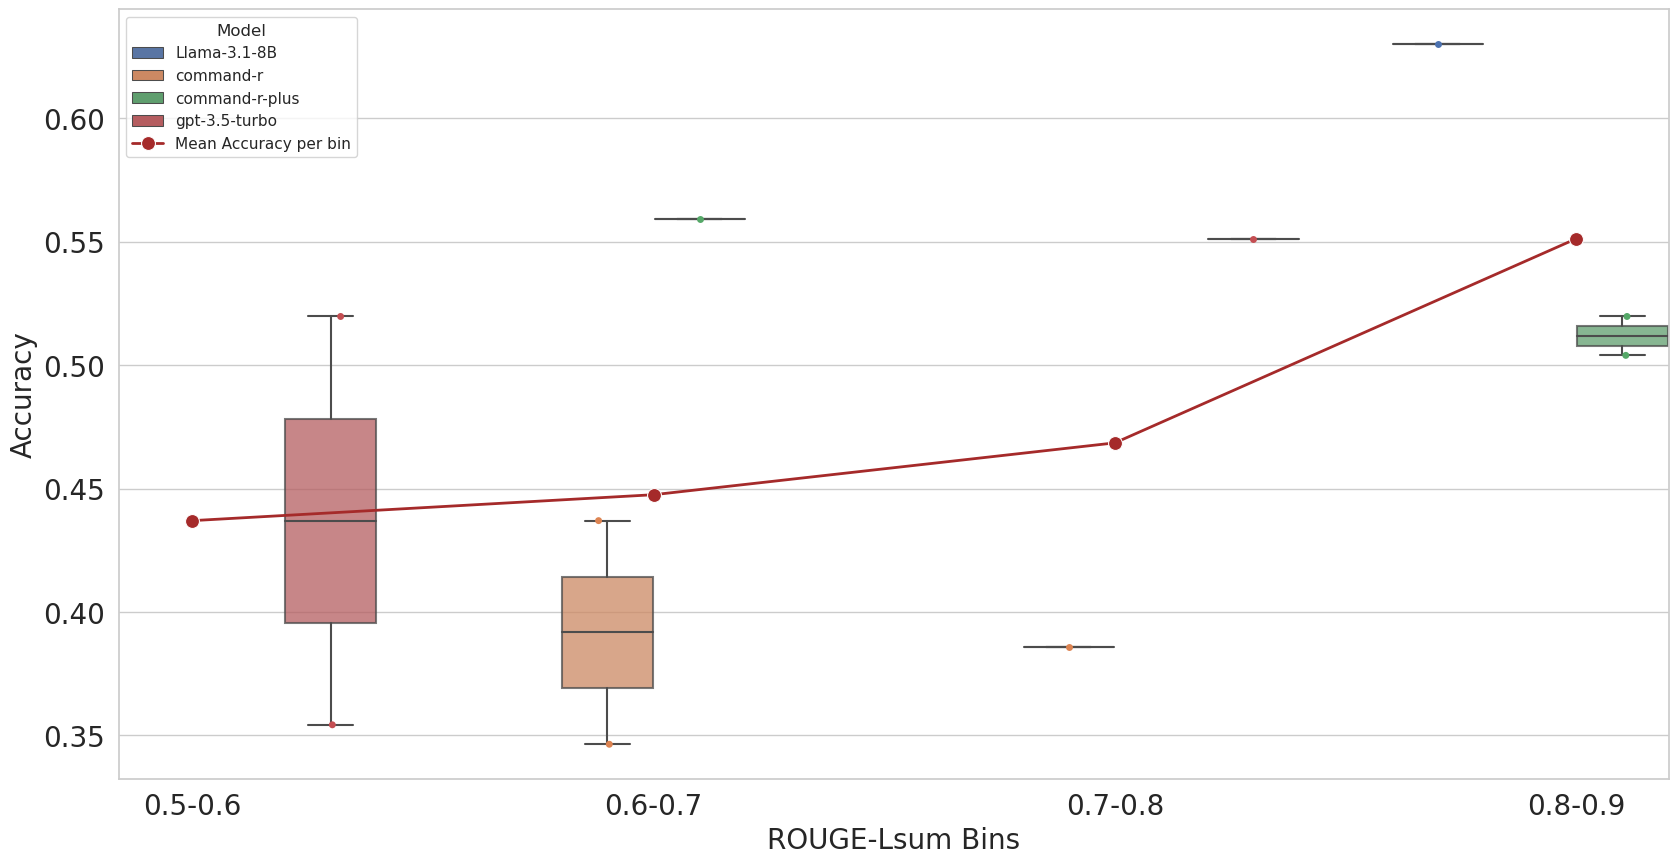

| model          |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |    0.5-0.6 |    0.6-0.7 |    0.7-0.8 |    0.8-0.9 |   0.9-1 |
|:---------------|--------:|----------:|----------:|----------:|----------:|-----------:|-----------:|-----------:|-----------:|--------:|
| Llama-3.1-8B   |     nan |       nan |       nan |       nan |       nan | nan        | nan        | nan        |   0.629921 |     nan |
| command-r      |     nan |       nan |       nan |       nan |       nan | nan        |   0.391732 |   0.385827 | nan        |     nan |
| command-r-plus |     nan |       nan |       nan |       nan |       nan | nan        |   0.559055 | nan        |   0.511811 |     nan |
| gpt-3.5-turbo  |     nan |       nan |       nan |       nan |       nan |   0.437008 | nan        |   0.551181 | nan        |     nan |
Plotting for AQUA


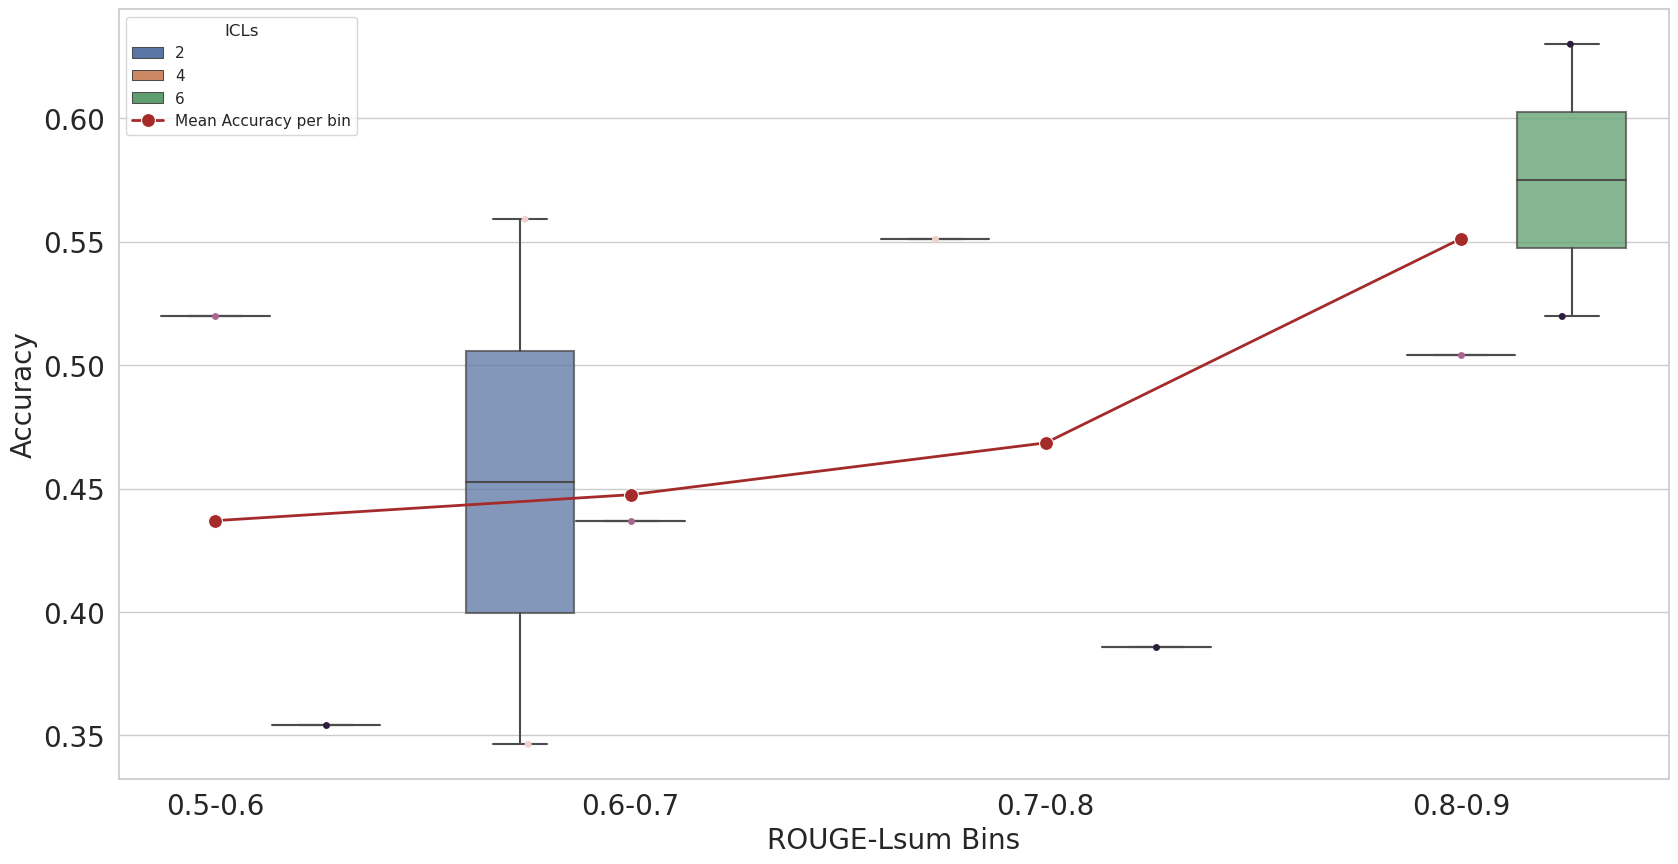

|   icl |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |    0.5-0.6 |    0.6-0.7 |    0.7-0.8 |    0.8-0.9 |   0.9-1 |
|------:|--------:|----------:|----------:|----------:|----------:|-----------:|-----------:|-----------:|-----------:|--------:|
|     2 |     nan |       nan |       nan |       nan |       nan | nan        |   0.452756 |   0.551181 | nan        |     nan |
|     4 |     nan |       nan |       nan |       nan |       nan |   0.519685 |   0.437008 | nan        |   0.503937 |     nan |
|     6 |     nan |       nan |       nan |       nan |       nan |   0.354331 | nan        |   0.385827 |   0.574803 |     nan |
____________________________________________________________________________________________________
Plotting for Sports
['Llama-3.1-8B', 'command-r', 'command-r-plus', 'gpt-3.5-turbo', 'Llama-3.1-8B', 'command-r', 'command-r-plus', 'gpt-3.5-turbo', 'Mean Accuracy per bin']
[<matplotlib.patches.Rectangle object at 0x79b3af719110>, <matplotlib.patch

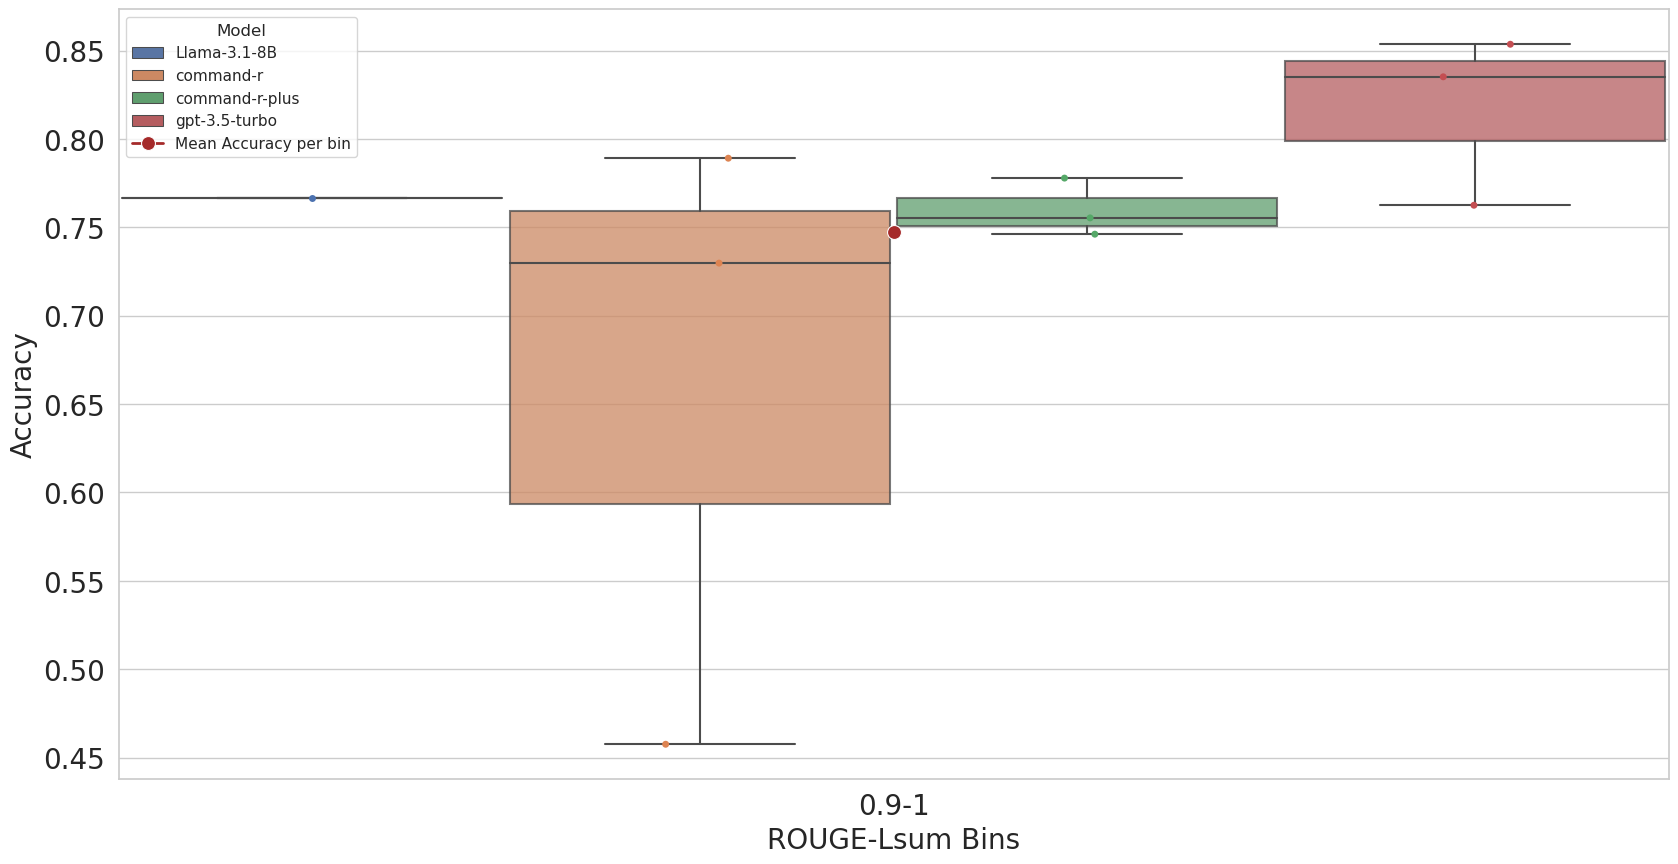

| model          |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |   0.5-0.6 |   0.6-0.7 |   0.7-0.8 |   0.8-0.9 |    0.9-1 |
|:---------------|--------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|---------:|
| Llama-3.1-8B   |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan | 0.766633 |
| command-r      |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan | 0.65882  |
| command-r-plus |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan | 0.759809 |
| gpt-3.5-turbo  |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan | 0.817127 |
Plotting for Sports


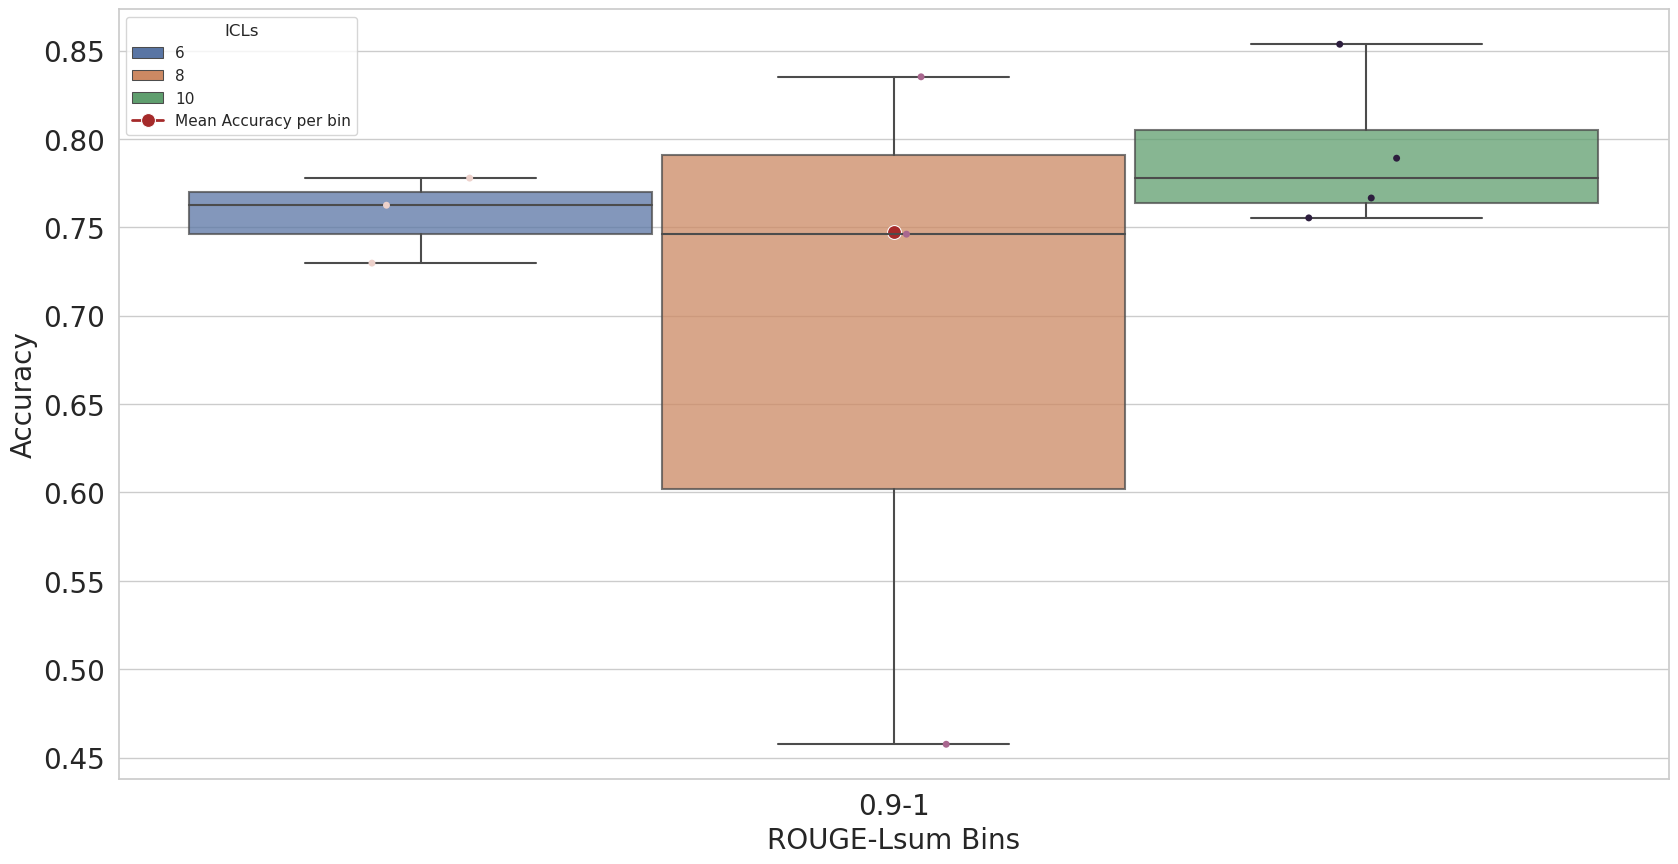

|   icl |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |   0.5-0.6 |   0.6-0.7 |   0.7-0.8 |   0.8-0.9 |    0.9-1 |
|------:|--------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|---------:|
|     6 |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan | 0.756738 |
|     8 |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan | 0.679632 |
|    10 |     nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan |       nan | 0.791198 |
____________________________________________________________________________________________________
Plotting for Date
['Llama-3.1-8B', 'command-r', 'command-r-plus', 'Llama-3.1-8B', 'command-r', 'command-r-plus', 'Mean Accuracy per bin']
[<matplotlib.patches.Rectangle object at 0x79b3b55f1710>, <matplotlib.patches.Rectangle object at 0x79b3b2b70710>, <matplotlib

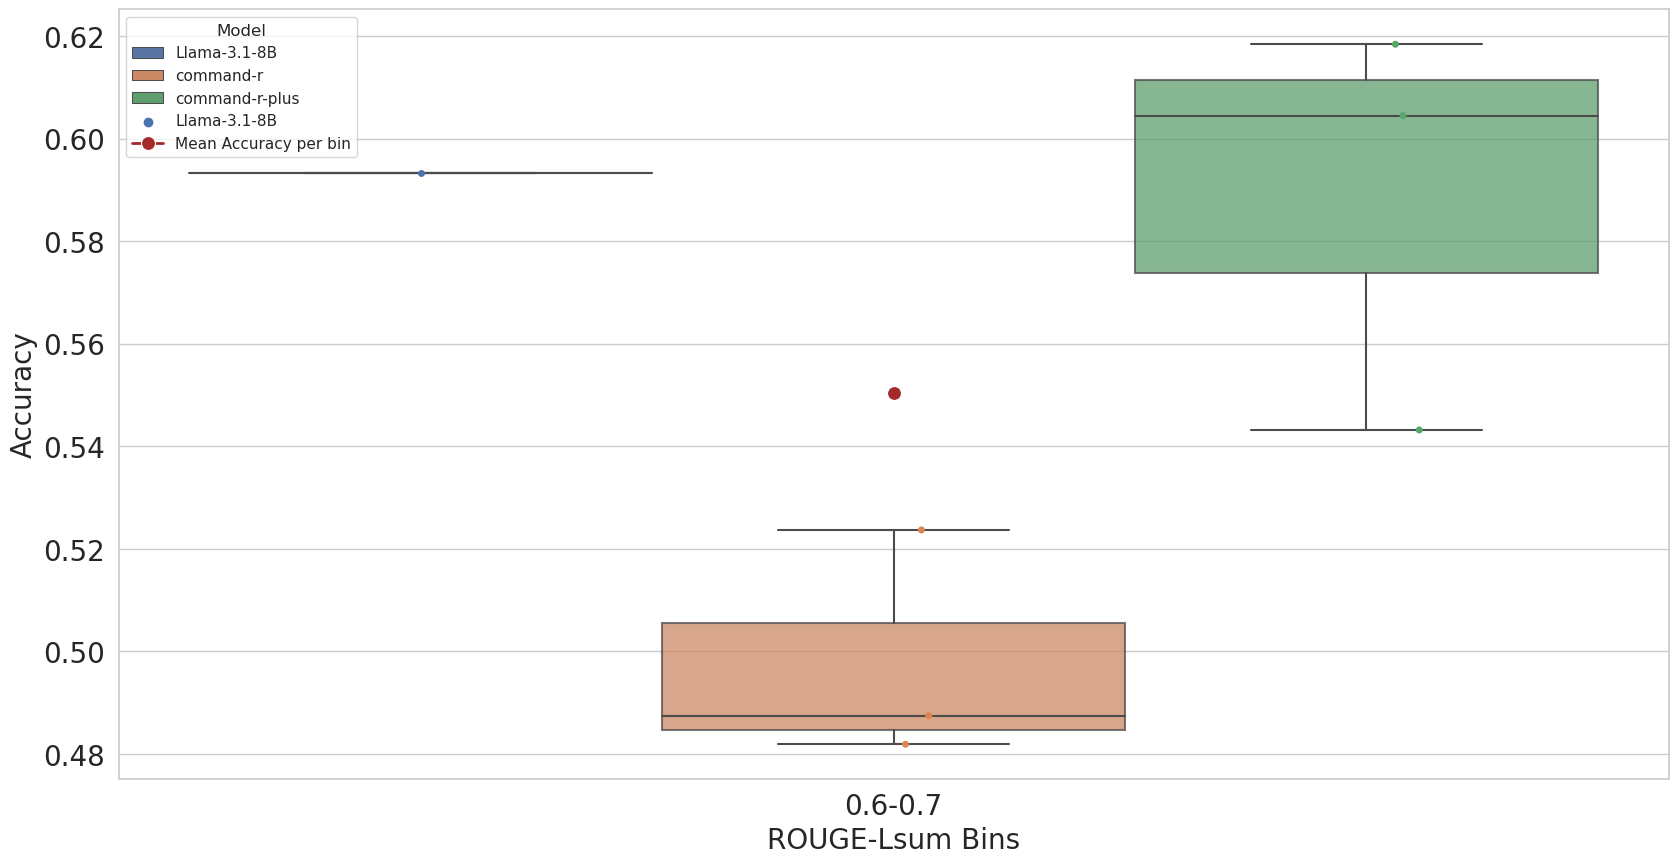

| model          |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |   0.5-0.6 |   0.6-0.7 |   0.7-0.8 |   0.8-0.9 |   0.9-1 |
|:---------------|--------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|--------:|
| Llama-3.1-8B   |     nan |       nan |       nan |       nan |       nan |       nan |  0.593315 |       nan |       nan |     nan |
| command-r      |     nan |       nan |       nan |       nan |       nan |       nan |  0.497679 |       nan |       nan |     nan |
| command-r-plus |     nan |       nan |       nan |       nan |       nan |       nan |  0.588672 |       nan |       nan |     nan |
Plotting for Date


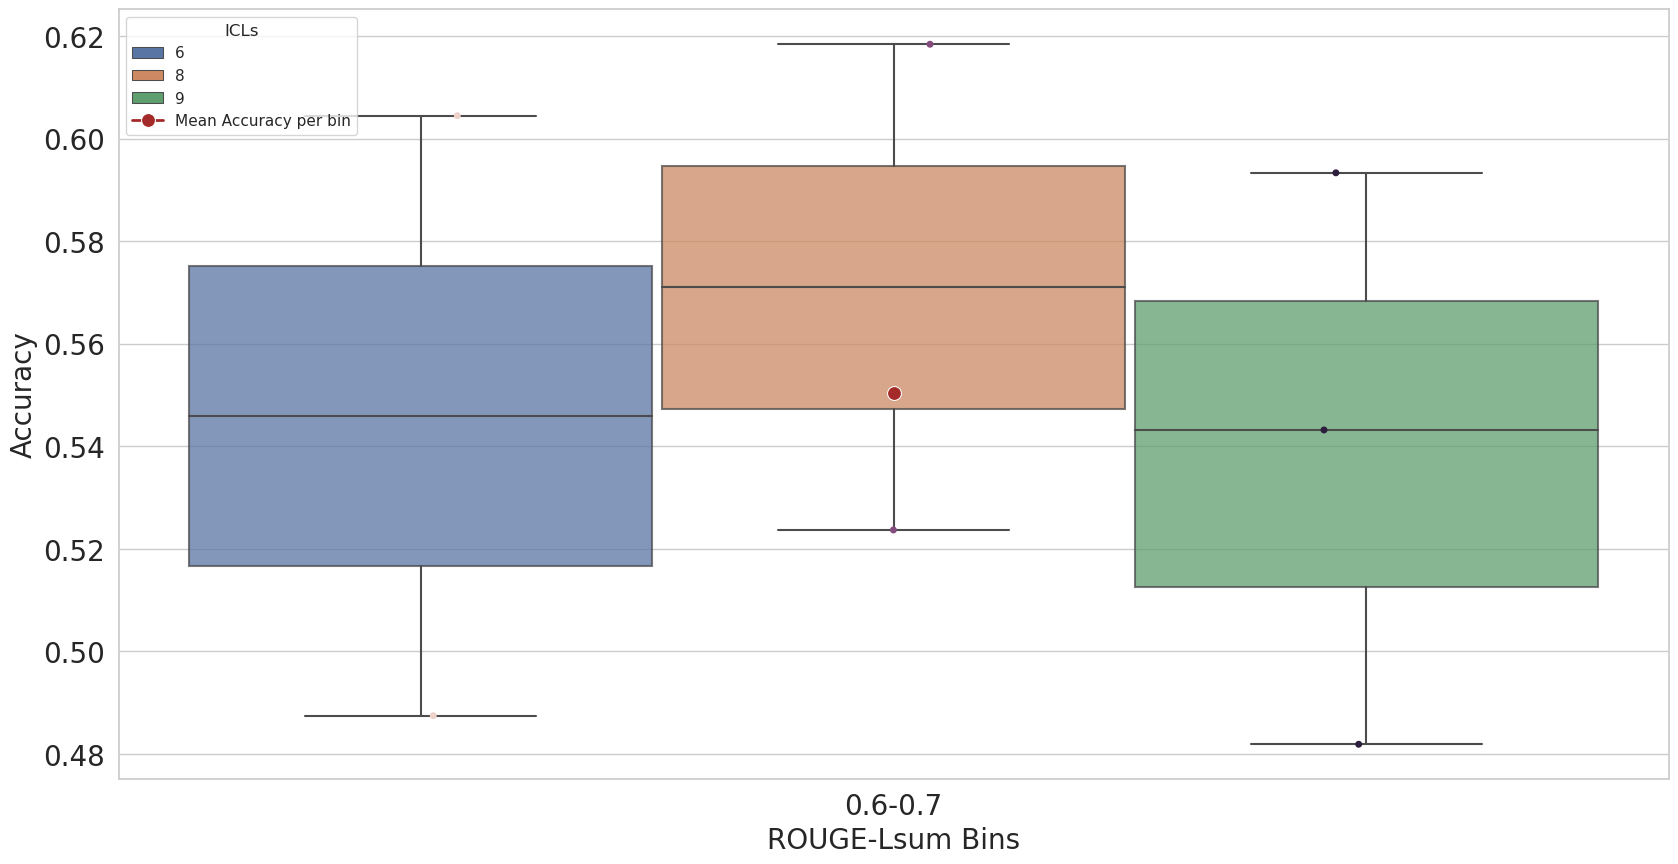

|   icl |   0-0.1 |   0.1-0.2 |   0.2-0.3 |   0.3-0.4 |   0.4-0.5 |   0.5-0.6 |   0.6-0.7 |   0.7-0.8 |   0.8-0.9 |   0.9-1 |
|------:|--------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|--------:|
|     6 |     nan |       nan |       nan |       nan |       nan |       nan |  0.545961 |       nan |       nan |     nan |
|     8 |     nan |       nan |       nan |       nan |       nan |       nan |  0.571031 |       nan |       nan |     nan |
|     9 |     nan |       nan |       nan |       nan |       nan |       nan |  0.539461 |       nan |       nan |     nan |
____________________________________________________________________________________________________


In [23]:
#import for correlogram
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

def plot_acc_vs_rouge_model(df, dataset=None):

    if dataset:
        print(f"Plotting for {dataset}")
        df = df[df["dataset"] == dataset]

    elif dataset is None:
        dataset = f"All Datasets"
        print("Plotting for all datasets")
    

    #if dataset is not None, then we are plotting for a specific dataset
    if len(df) == 0:
        print(f"No data for {dataset}")
        return

    #verty big plot
    fig = plt.figure(figsize=(20, 10))
    ax = sns.boxplot(x='rougeLsum_bins', y='Accuracy', hue='model', data=df, boxprops={'alpha': 0.75})
    
    sns.stripplot(x='rougeLsum_bins', y='Accuracy', hue='model', data=df, dodge=True, jitter=True)
    #mean per bin
    mean_df = df.groupby(["rougeLsum_bins"])["Accuracy"].mean().reset_index()
    #dashed yellow line
    sns.lineplot(x='rougeLsum_bins', y='Accuracy', data=mean_df, color='brown', marker='o', markersize=10, linewidth=2, label='Mean Accuracy per bin')



    handles, labels = ax.get_legend_handles_labels()
    print(labels)
    print(handles)
        
    if len(handles) > 10:
        #make the handles font size bigger

        ax.legend(handles=[handles[0], handles[1], handles[2], handles[3], handles[-1]], \
                  labels=[labels[0], labels[1], labels[2], labels[3], labels[-1]], title="Model", loc='upper left')
        

    else:
        ax.legend(handles=[handles[0], handles[1], handles[2], handles[3], handles[-1]], \
                  labels=[labels[0], labels[1], labels[2], labels[3], labels[-1]], title="Model", loc='upper left')
    # ax.legend(handles=[handles[0], handles[1], handles[2], handles[3], handles[4], handles[-1]], labels=labels, title="Model", loc='upper left')
   
    mean_df = df.groupby(["model", "rougeLsum_bins"])["Accuracy"].mean().reset_index()
    #remove from the legend
    # plt.legend(title="Model", loc='upper left')

    #xticks and yticks fontsize
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #xlabel and ylabel fontsize
    plt.xlabel("ROUGE-Lsum Bins", fontsize=20)
    plt.ylabel("Accuracy", fontsize=20)




    # fig.suptitle(f"Model Accuracy w.r.t ROUGE-Lsum for {dataset}", fontsize=20)

    plt.show()
    #print the table for the plot in markdown
    print(df.groupby(["model", "rougeLsum_bins"])["Accuracy"].mean().unstack().to_markdown())

    #save the plot
    filename = f"model_accuracy_vs_rouge_{dataset}.pdf"
    fig.savefig(filename, bbox_inches='tight')


def plot_acc_vs_rouge_icl(df, dataset=None):

    if dataset:
        print(f"Plotting for {dataset}")
        df = df[df["dataset"] == dataset]

    elif dataset is None:
        dataset = f"All Datasets"
        print("Plotting for all datasets")
    

    #if dataset is not None, then we are plotting for a specific dataset
    if len(df) == 0:
        print(f"No data for {dataset}")
        return

    #verty big plot
    fig = plt.figure(figsize=(20, 10))
    
    ax = sns.boxplot(x='rougeLsum_bins', y='Accuracy', hue='icl', data=df, boxprops={'alpha': 0.75})
    #hue the same as the above
    sns.stripplot(x='rougeLsum_bins', y='Accuracy', hue='icl', data=df, dodge=True, jitter=True)

    #mean per bin
    mean_df = df.groupby(["rougeLsum_bins"])["Accuracy"].mean().reset_index()
    #dashed yellow line
    sns.lineplot(x='rougeLsum_bins', y='Accuracy', data=mean_df, color='brown', marker='o', markersize=10, linewidth=2, label='Mean Accuracy per bin')

    handles, labels = ax.get_legend_handles_labels()
    # if len(handles) > 10:
    #     ax.legend(handles=[handles[0], handles[1], handles[2], handles[3], handles[4], handles[-1]], labels=[labels[0], labels[1], labels[2], labels[3], labels[4], labels[-1]], title="ICL", loc='upper left')
    # else:
    #     ax.legend(handles=[handles[0], handles[1], handles[2], handles[-1]], labels=[labels[0], labels[1], labels[2], labels[-1]], title="ICL", loc='upper left')
   
    if len(handles) > 10:
        ax.legend(handles=[handles[0], handles[1], handles[2], handles[3], handles[-1]], \
              labels=[labels[0], labels[1], labels[2], labels[3], labels[-1]], title="ICLs", loc='upper left')
    else:
        ax.legend(handles=[handles[0], handles[1], handles[2], handles[-1]], \
              labels=[labels[0], labels[1], labels[2], labels[-1]], title="ICLs", loc='upper left')
   
    mean_df = df.groupby(["icl", "rougeLsum_bins"])["Accuracy"].mean().reset_index()
    #remove from the legend
    # plt.legend(title="Model", loc='upper left')

    #xticks and yticks fontsize
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #xlabel and ylabel fontsize
    plt.xlabel("ROUGE-Lsum Bins", fontsize=20)
    plt.ylabel("Accuracy", fontsize=20)

    # fig.suptitle(f"ICL Accuracy w.r.t ROUGE-Lsum for {dataset}", fontsize=20)

    plt.show()
    #print the table for the plot in markdown
    print(df.groupby(["icl", "rougeLsum_bins"])["Accuracy"].mean().unstack().to_markdown())

    #save the plot
    filename = f"icl_accuracy_vs_rouge_{dataset}.pdf"
    fig.savefig(filename, bbox_inches='tight')



#order by model
full_results = full_results.sort_values(by=['model'])
plot_acc_vs_rouge_model(full_results[full_results["execmode"] == "trace"])
full_results = full_results.sort_values(by=['icl'])
plot_acc_vs_rouge_icl(full_results[full_results["execmode"] == "trace"])
print("__" * 50)

for dataset in full_results["dataset"].unique():
    full_results = full_results.sort_values(by=['model'])
    plot_acc_vs_rouge_model(full_results[full_results["execmode"] == "trace"], dataset)
    full_results = full_results.sort_values(by=['icl'])
    plot_acc_vs_rouge_icl(full_results[full_results["execmode"] == "trace"], dataset)
    print("__" * 50)

## Code Running percentage

['model=command-r-plus', 'execmode=trace', 'prompt=standard', 'icl=2']
['model=command-r-plus', 'execmode=trace', 'prompt=standard', 'icl=4']
['model=command-r-plus', 'execmode=trace', 'prompt=standard', 'icl=6']
['model=command-r', 'execmode=trace', 'prompt=standard', 'icl=2']
['model=command-r', 'execmode=trace', 'prompt=standard', 'icl=4']
['model=command-r', 'execmode=trace', 'prompt=standard', 'icl=6']
['model=gpt-3.5-turbo', 'execmode=trace', 'prompt=standard', 'icl=2']
['model=gpt-3.5-turbo', 'execmode=trace', 'prompt=standard', 'icl=4']
['model=gpt-3.5-turbo', 'execmode=trace', 'prompt=standard', 'icl=6']


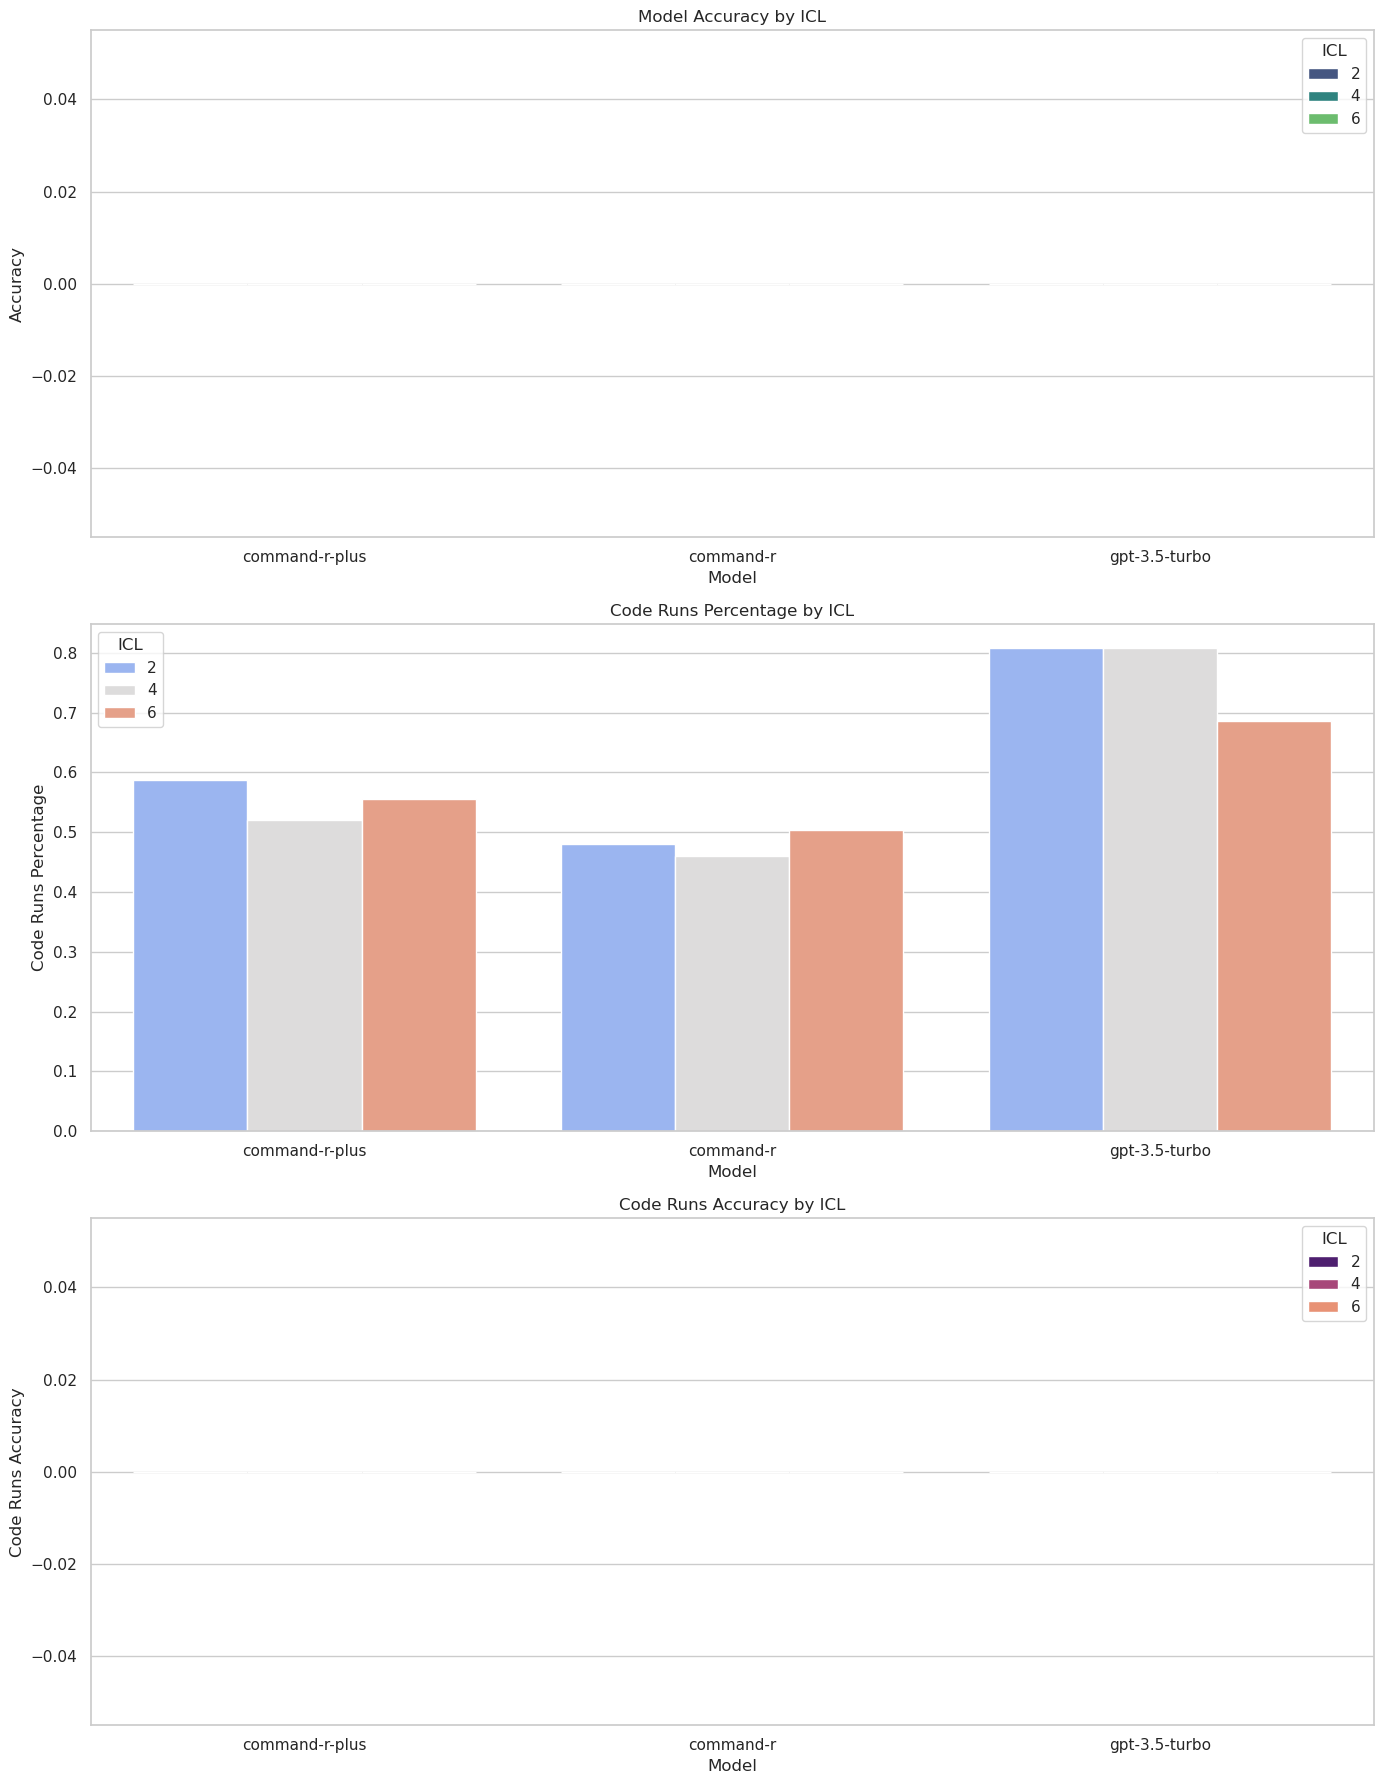

In [24]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_results(filename):
    # Load JSON data from the file
    with open(filename, 'r') as file:
        data = json.load(file)
    
    # Prepare lists to hold data
    models = []
    icls = []
    execmodes = []
    prompts = []
    accuracies = []
    code_runs_percs = []
    code_runs_accs = []
    
    # Extract and organize data from JSON
    for key, values in data.items():
        file_details = key.split('/')[-1].replace('_output.json', '').split('_')
        print(file_details)
        details_dict = {item.split('=')[0]: item.split('=')[1] for item in file_details}
        
        models.append(details_dict.get('model'))
        icls.append(details_dict.get('icl'))
        execmodes.append(details_dict.get('execmode'))
        prompts.append(details_dict.get('prompt'))
        accuracies.append(values['Accuracy'])
        code_runs_percs.append(values['code_runs_perc'])
        code_runs_accs.append(values['code_runs_acc'])

    # Create DataFrame
    df = pd.DataFrame({
        'Model': models,
        'ICL': icls,
        'ExecMode': execmodes,
        'Prompt': prompts,
        'Accuracy': accuracies,
        'Code Runs Percentage': code_runs_percs,
        'Code Runs Accuracy': code_runs_accs
    })

    # Plotting
    sns.set(style="whitegrid")
    fig, axs = plt.subplots(3, 1, figsize=(14, 18))

    #sort the dataframe by icl
    df = df.sort_values(by=['ICL'])

    # Accuracy Plot
    sns.barplot(x='Model', y='Accuracy', hue='ICL', data=df, ax=axs[0], palette='viridis')
    axs[0].set_title('Model Accuracy by ICL')
    axs[0].tick_params(axis='x', rotation=0)

    # Code Runs Percentage Plot
    sns.barplot(x='Model', y='Code Runs Percentage', hue='ICL', data=df, ax=axs[1], palette='coolwarm')
    axs[1].set_title('Code Runs Percentage by ICL')
    axs[1].tick_params(axis='x', rotation=0)
    
    # Code Runs Accuracy Plot
    sns.barplot(x='Model', y='Code Runs Accuracy', hue='ICL', data=df, ax=axs[2], palette='magma')
    axs[2].set_title('Code Runs Accuracy by ICL')
    axs[2].tick_params(axis='x', rotation=0)

    #save the plot
    base_filename = filename.split("/")[-1].replace(".json", "")
    plt.savefig(f'results_plot_{base_filename}.pdf')

    plt.tight_layout()
    plt.show()

    return df
# To use this function, call it with the filename:
# plot_results_with_details('results.json')


# a =  plot_results('results/GSM8k_code_exact.json')
# b = plot_results('results/SQA_code_exact.json')
c = plot_results('results/AQUA_code_exact.json')

In [25]:
import os  

def load_json(filename):
    with open(filename, 'r') as file:
            data = json.load(file)
    return data


code_stats = {}
for file in os.listdir("results"):
    dataset = file.split("_")[0]
    if "json" in file and "code" in file:
        # data = load_json(f"results/{file}")
        print(file)
        code_stats[dataset] = load_json(f"results/{file}")


# Prepare lists to hold data
models = []
icls = []
execmodes = []
prompts = []
accuracies = []
code_runs_percs = []
code_runs_accs = []

# Extract and organize data from JSON

df = None
for dataset in code_stats:
    for key, values in code_stats[dataset].items():
        file_details = key.split('/')[-1].replace('_output.json', '').split('_')
        # print(file_details)
        details_dict = {item.split('=')[0]: item.split('=')[1] for item in file_details}
        
        models.append(details_dict.get('model'))
        icls.append(details_dict.get('icl'))
        execmodes.append(details_dict.get('execmode'))
        prompts.append(details_dict.get('prompt'))
        accuracies.append(values['Accuracy'])
        code_runs_percs.append(values['code_runs_perc'])
        code_runs_accs.append(values['code_runs_acc'])

    if df is None:
        df = pd.DataFrame({
            'Model': models,
            'Dataset': dataset,
            'ICL': icls,
            'ExecMode': execmodes,
            'Prompt': prompts,
            'Accuracy': accuracies,
            'Code Runs Percentage': code_runs_percs,
            'Code Runs Accuracy': code_runs_accs
        })
    else:
        df = pd.concat([df, pd.DataFrame({
            'Model': models,
            'Dataset': dataset,
            'ICL': icls,
            'ExecMode': execmodes,
            'Prompt': prompts,
            'Accuracy': accuracies,
            'Code Runs Percentage': code_runs_percs,
            'Code Runs Accuracy': code_runs_accs
        })])

df

SQA_code_exact.json
GSM8k_code_exact.json
AQUA_code_exact.json


,Model,Dataset,ICL,ExecMode,Prompt,Accuracy,Code Runs Percentage,Code Runs Accuracy
0,command-r-plus,SQA,2,trace,standard,0.271616,0.586463,0.463142
1,command-r-plus,SQA,4,trace,standard,0.292576,0.619651,0.472163
2,command-r-plus,SQA,6,trace,standard,0.306550,0.639738,0.479181
3,command-r,SQA,2,trace,standard,0.244978,0.514410,0.476231
4,command-r,SQA,4,trace,standard,0.233624,0.505240,0.462403
5,command-r,SQA,6,trace,standard,0.261572,0.551965,0.473892
6,gpt-3.5-turbo,SQA,2,trace,standard,0.426201,0.914847,0.465871
7,gpt-3.5-turbo,SQA,6,trace,standard,0.439738,0.931441,0.472105
0,command-r-plus,GSM8k,2,trace,standard,0.271616,0.586463,0.463142
1,command-r-plus,GSM8k,4,trace,standard,0.292576,0.619651,0.472163


(<Figure size 1400x800 with 1 Axes>,
 <Axes: title={'center': 'Correct Executable Code (%) by Dataset'}, xlabel='Dataset', ylabel='Correct Executable Code (%) Percentage'>)

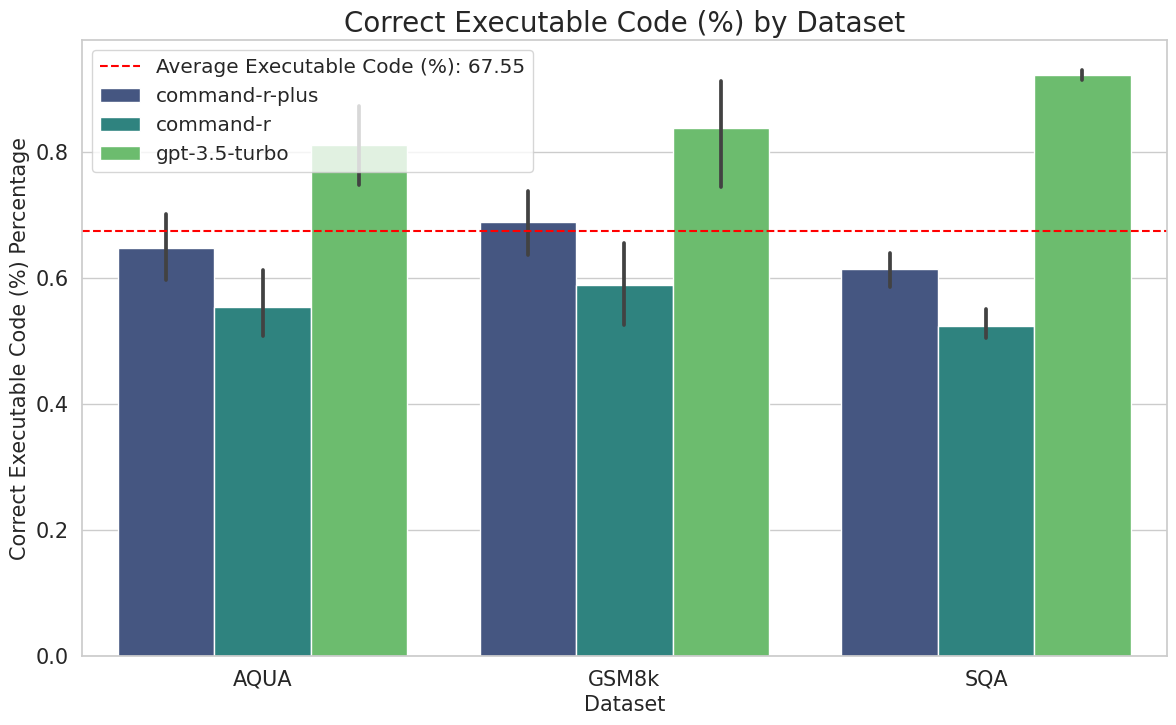

In [26]:
def plot_code_exec_percentage_by_dataset(df):
    #plot code runs accuracy by dataset grouped by model
    sns.set(style="whitegrid")
    fig, axs = plt.subplots(1, 1, figsize=(14, 8))

    #sort the dataframe by dataset
    df = df.sort_values(by=['Dataset'])

    # Code Runs Accuracy Plot
    sns.barplot(x='Dataset', y='Code Runs Percentage', hue='Model', data=df, ax=axs, palette='viridis')
    axs.set_title('Correct Code Execution Percentage by Dataset')
    axs.tick_params(axis='x', rotation=0)

    #mean line
    mean_df = df.groupby(["Dataset"])["Code Runs Percentage"].mean().reset_index()
    #dashed yellow line
    # sns.lineplot(x='Dataset', y='Code Runs Accuracy', data=mean_df, color='brown', marker='o', markersize=10, linewidth=2, label='Mean Accuracy per dataset')

    #mean over all datasets
    mean_overall = df["Code Runs Percentage"].mean()
    axs.axhline(mean_overall, color='red', linestyle='--', label=f'Average Executable Code (%): {mean_overall * 100:.2f}')



    #save the plot
    plt.savefig(f'code_exec_percentage_by_dataset.pdf')

    #font size
    plt.legend(fontsize='large')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #increase title font size
    plt.title('Correct Executable Code (%) by Dataset', fontsize=20)
    #increase x and y labels font size
    plt.xlabel('Dataset', fontsize=15)
    plt.ylabel('Correct Executable Code (%) Percentage', fontsize=15)


    # plt.tight_layout()
    # plt.show()

    return fig, axs

plot_code_exec_percentage_by_dataset(df)


In [27]:
#take only the top code runs accuracy for each model and dataset
# df_filtered = df.loc[df.groupby(['Model', 'Dataset'])['Code Runs Accuracy'].idxmax()]

In [28]:
# df_filtered

(<Figure size 1400x800 with 1 Axes>,
 <Axes: title={'center': 'Executable Code Accuracy(%) by Dataset'}, xlabel='Dataset', ylabel='Executable Code Accuracy(%)'>)

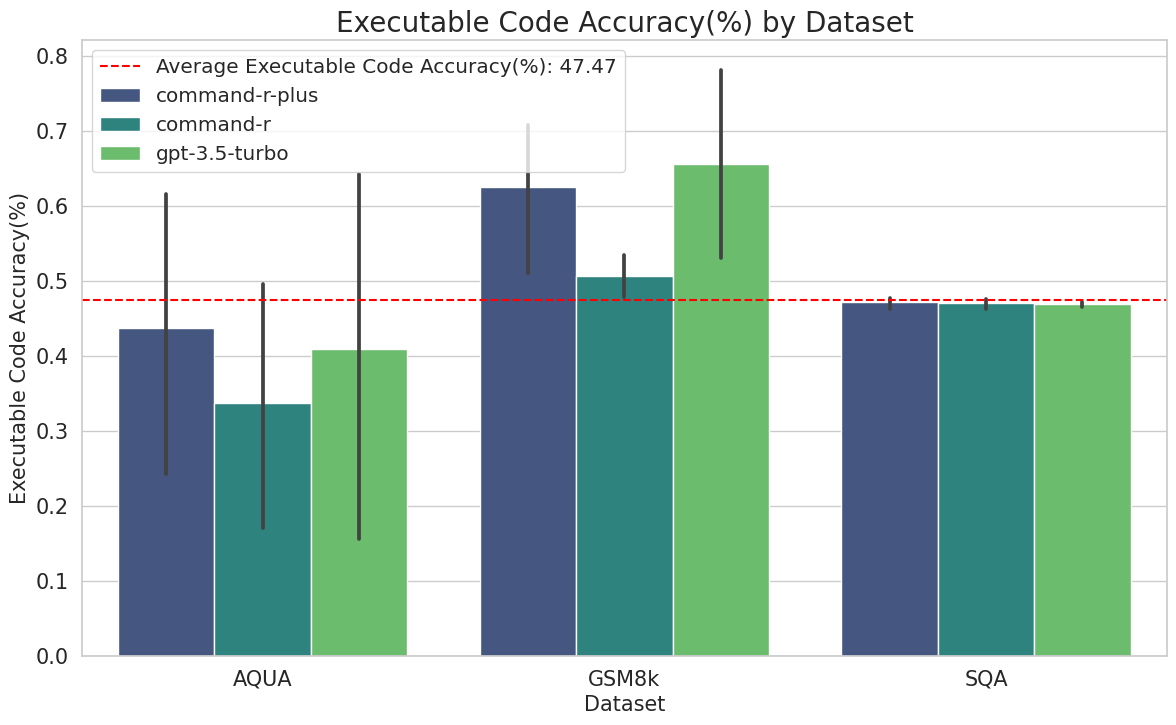

In [29]:
def plot_code_exec_accuracy_by_dataset(df):
    #plot code runs accuracy by dataset grouped by model
    sns.set(style="whitegrid")
    fig, axs = plt.subplots(1, 1, figsize=(14, 8))

    #sort the dataframe by dataset
    df = df.sort_values(by=['Dataset'])

    # Code Runs Accuracy Plot
    sns.barplot(x='Dataset', y='Code Runs Accuracy', hue='Model', data=df, ax=axs, palette='viridis')
    axs.set_title('Correct Code Execution Percentage by Dataset')
    axs.tick_params(axis='x', rotation=0)

    #mean line
    mean_df = df.groupby(["Dataset"])["Code Runs Accuracy"].mean().reset_index()
    #dashed yellow line
    # sns.lineplot(x='Dataset', y='Code Runs Accuracy', data=mean_df, color='brown', marker='o', markersize=10, linewidth=2, label='Mean Accuracy per dataset')

    #mean over all datasets
    mean_overall = df["Code Runs Accuracy"].mean()
    axs.axhline(mean_overall, color='red', linestyle='--', label=f'Average Executable Code Accuracy(%): {mean_overall * 100:.2f}')



    #save the plot
    plt.savefig(f'code_exec_accuracy_by_dataset.pdf')

    #font size
    plt.legend(fontsize='large')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #increase title font size
    plt.title('Executable Code Accuracy(%) by Dataset', fontsize=20)
    #increase x and y labels font size
    plt.xlabel('Dataset', fontsize=15)
    plt.ylabel('Executable Code Accuracy(%)', fontsize=15)


    # plt.tight_layout()
    # plt.show()

    return fig, axs

plot_code_exec_accuracy_by_dataset(df)


In [30]:
df

,Model,Dataset,ICL,ExecMode,Prompt,Accuracy,Code Runs Percentage,Code Runs Accuracy
0,command-r-plus,SQA,2,trace,standard,0.271616,0.586463,0.463142
1,command-r-plus,SQA,4,trace,standard,0.292576,0.619651,0.472163
2,command-r-plus,SQA,6,trace,standard,0.306550,0.639738,0.479181
3,command-r,SQA,2,trace,standard,0.244978,0.514410,0.476231
4,command-r,SQA,4,trace,standard,0.233624,0.505240,0.462403
5,command-r,SQA,6,trace,standard,0.261572,0.551965,0.473892
6,gpt-3.5-turbo,SQA,2,trace,standard,0.426201,0.914847,0.465871
7,gpt-3.5-turbo,SQA,6,trace,standard,0.439738,0.931441,0.472105
0,command-r-plus,GSM8k,2,trace,standard,0.271616,0.586463,0.463142
1,command-r-plus,GSM8k,4,trace,standard,0.292576,0.619651,0.472163


/tmp/ipykernel_34396/1642013544.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=20)
/tmp/ipykernel_34396/1642013544.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=20)


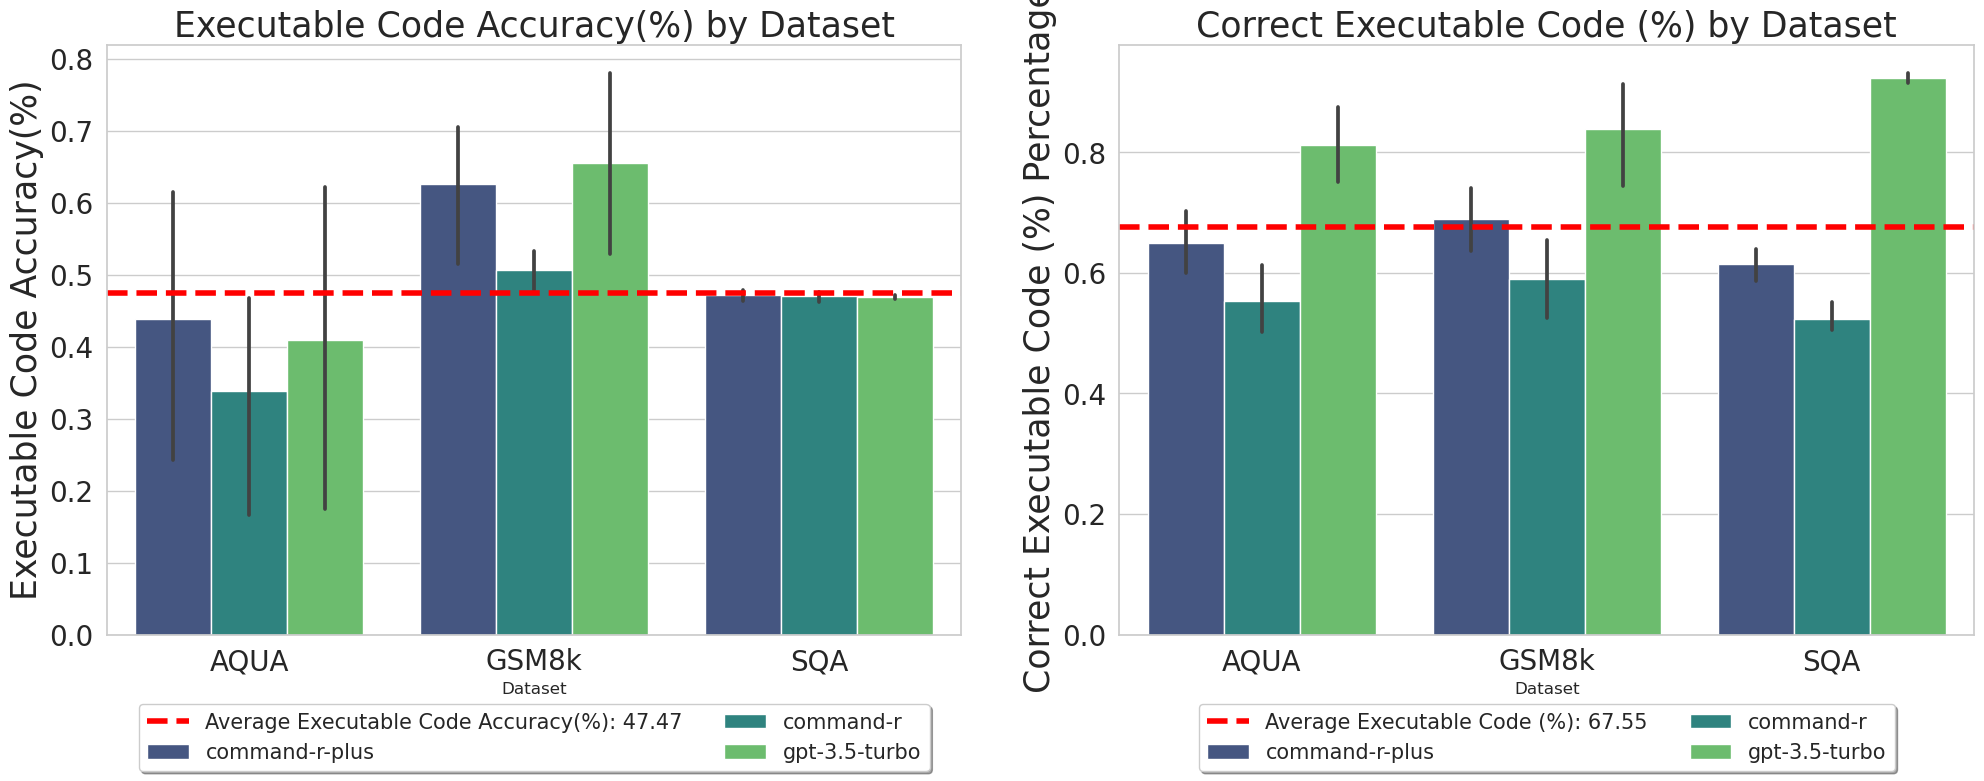

(<Figure size 2000x800 with 2 Axes>,
 array([<Axes: title={'center': 'Executable Code Accuracy(%) by Dataset'}, xlabel='Dataset', ylabel='Executable Code Accuracy(%)'>,
        <Axes: title={'center': 'Correct Executable Code (%) by Dataset'}, xlabel='Dataset', ylabel='Correct Executable Code (%) Percentage'>],
       dtype=object))

In [62]:
#combine the two plots into one horizontal plot
def plot_code_exec(df):
    sns.set(style="whitegrid")
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))

    #sort the dataframe by dataset
    df = df.sort_values(by=['Dataset'])

    # Code Runs Accuracy Plot
    sns.barplot(x='Dataset', y='Code Runs Accuracy', hue='Model', data=df, ax=axs[0], palette='viridis')
    axs[0].set_title('Correct Code Execution Percentage by Dataset')

    #mean line
    mean_df = df.groupby(["Dataset"])["Code Runs Accuracy"].mean().reset_index()
    #dashed yellow line
    # sns.lineplot(x='Dataset', y='Code Runs Accuracy', data=mean_df, color='brown', marker='o', markersize=10, linewidth=2, label='Mean Accuracy per dataset')

    #mean over all datasets
    mean_overall = df["Code Runs Accuracy"].mean()
    axs[0].axhline(mean_overall, color='red', linestyle='--', label=f'Average Executable Code Accuracy(%): {mean_overall * 100:.2f}', linewidth=4)

    # Code Runs Accuracy Plot
    sns.barplot(x='Dataset', y='Code Runs Percentage', hue='Model', data=df, ax=axs[1], palette='viridis')
    axs[1].set_title('Correct Code Execution Percentage by Dataset')

    #mean line
    mean_df = df.groupby(["Dataset"])["Code Runs Percentage"].mean().reset_index()
    #dashed yellow line
    # sns.lineplot(x='Dataset', y='Code Runs Accuracy', data=mean_df, color='brown', marker='o', markersize=10, linewidth=2, label='Mean Accuracy per dataset')

    #mean over all datasets
    mean_overall = df["Code Runs Percentage"].mean()
    axs[1].axhline(mean_overall, color='red', linestyle='--', label=f'Average Executable Code (%): {mean_overall * 100:.2f}', linewidth=4)



    #font size
    axs[0].legend(fontsize=20)
    axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=20)
    axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=20)
    #increase title font size
    axs[0].set_title('Executable Code Accuracy(%) by Dataset', fontsize=25)
    #increase x and y labels font size
    # axs[0].set_xlabel('Dataset', fontsize=25)
    axs[0].set_ylabel('Executable Code Accuracy(%)', fontsize=25)

    #font size
    axs[1].legend(fontsize=20)
    axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=20)
    axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=20)
    #increase title font size
    axs[1].set_title('Correct Executable Code (%) by Dataset', fontsize=25)
    #increase x and y labels font size
    # axs[1].set_xlabel('Dataset', fontsize=15)
    axs[1].set_ylabel('Correct Executable Code (%) Percentage', fontsize=25)

    axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2, fontsize=15)
    axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2, fontsize=15)

    #save the plot with trimmed whitespace
    plt.savefig(f'code_exec_by_dataset.pdf', bbox_inches='tight')


    plt.tight_layout()
    plt.show()




    return fig, axs

plot_code_exec(df)

## Effect of In-context samples

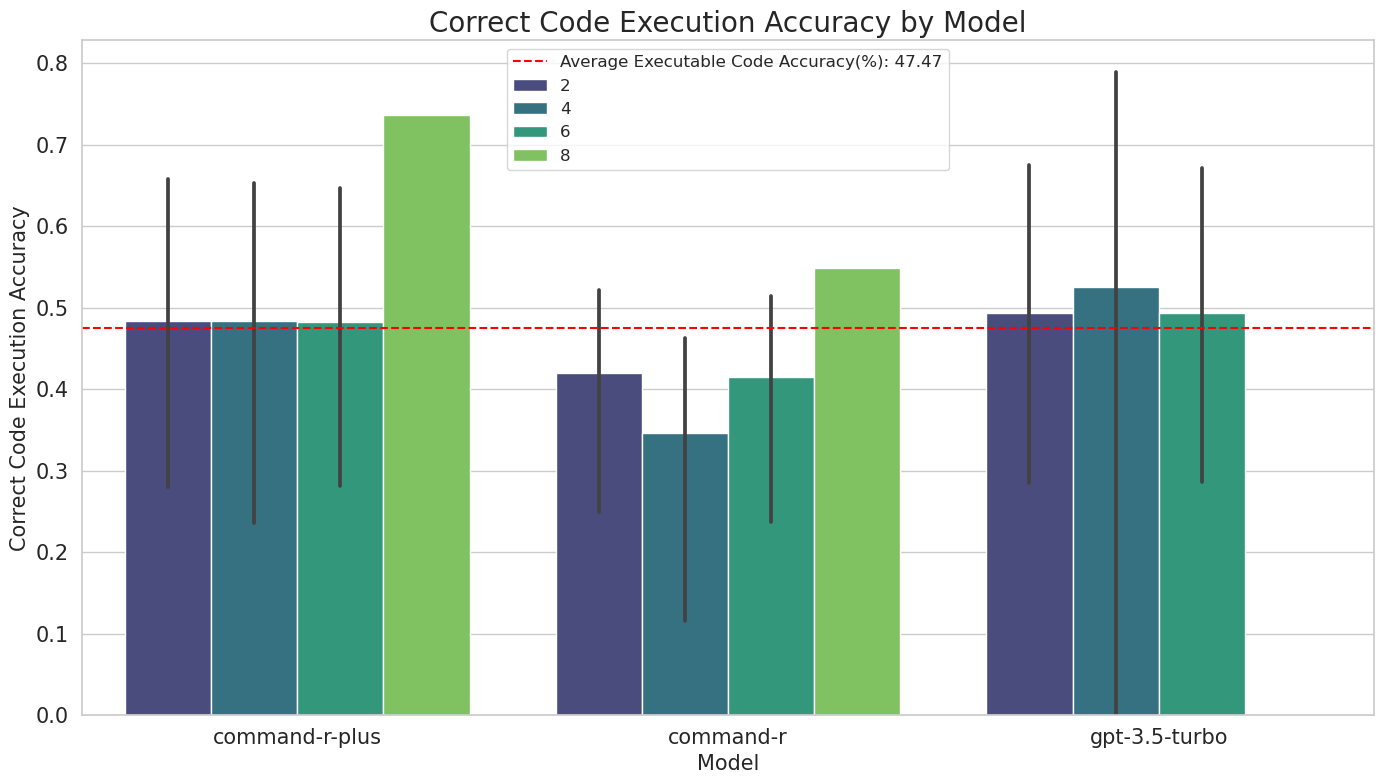

In [45]:
#plot code runs accuracy by model grouped by icl
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 1, figsize=(14, 8))

#sort the dataframe by icl
df = df.sort_values(by=['ICL'])

# Code Runs Accuracy Plot
sns.barplot(x='Model', y='Code Runs Accuracy', hue='ICL', data=df, ax=axs, palette='viridis')
axs.set_title('Correct Code Execution Accuracy by Model')
axs.tick_params(axis='x', rotation=0)

#mean line
mean_df = df.groupby(["Model"])["Code Runs Accuracy"].mean().reset_index()
#dashed yellow line
# sns.lineplot(x='Model', y='Code Runs Accuracy', data=mean_df, color='brown', marker='o', markersize=10, linewidth=2, label='Mean Accuracy per model')

#mean over all datasets
mean_overall = df["Code Runs Accuracy"].mean()
axs.axhline(mean_overall, color='red', linestyle='--', label=f'Average Executable Code Accuracy(%): {mean_overall * 100:.2f}')


#save the plot
# plt.savefig(f'code_runs_accuracy_by_model.pdf')

#font size

plt.legend(fontsize='medium')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#increase title font size

plt.title('Correct Code Execution Accuracy by Model', fontsize=20)
#increase x and y labels font size
plt.xlabel('Model', fontsize=15)
plt.ylabel('Correct Code Execution Accuracy', fontsize=15)
#


plt.tight_layout()
plt.show()


In [82]:

combined_df = None
for result_file in os.listdir("results"):
    if "trace" in result_file and "exact" in result_file and result_file.endswith(".csv"):
        # print(result_file)
        if combined_df is None:
            combined_df = pd.read_csv(f"results/{result_file}")
        else:
            combined_df = pd.concat([combined_df, pd.read_csv(f"results/{result_file}")])
        print("__" * 50)

combined_df

____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
___________________________________________________________________________________________

,Unnamed: 0,Accuracy,model,execmode,prompt,icl
0,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.001919,gpt-3.5-turbo,trace,standard,4
1,model=command-r_execmode=trace_prompt=standard...,0.000960,command-r,trace,standard,2
2,model=command-r-plus_execmode=trace_prompt=sta...,0.000000,command-r-plus,trace,standard,2
3,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.000000,gpt-3.5-turbo,trace,standard,2
4,model=command-r-plus_execmode=trace_prompt=sta...,0.000000,command-r-plus,trace,standard,6
...,...,...,...,...,...,...
18,model=command-r_execmode=plan_only_prompt=stan...,0.247157,command-r,plan,standard,6
19,model=Meta-Llama-3-8B_execmode=trace_prompt=st...,0.244124,Meta-Llama-3-8B,trace,standard,2
20,model=Mixtral-8x7B-v0.1_execmode=trace_prompt=...,0.117513,Mixtral-8x7B-v0.1,trace,standard,2
21,model=Mixtral-8x7B-v0.1_execmode=trace_prompt=...,0.108415,Mixtral-8x7B-v0.1,trace,standard,4


In [83]:
#remove model Meta-Llama-3-8B and Mixtral-8x7B-v0.1
combined_df = combined_df[~combined_df["model"].isin(["Meta-Llama-3-8B", "Mixtral-8x7B-v0.1"])]

In [85]:
#acciracy 0
combined_df[combined_df['Accuracy'] == 0]

,Unnamed: 0,Accuracy,model,execmode,prompt,icl
2,model=command-r-plus_execmode=trace_prompt=sta...,0.0,command-r-plus,trace,standard,2
3,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.0,gpt-3.5-turbo,trace,standard,2
4,model=command-r-plus_execmode=trace_prompt=sta...,0.0,command-r-plus,trace,standard,6
5,model=command-r_execmode=trace_prompt=standard...,0.0,command-r,trace,standard,6
6,model=command-r_execmode=trace_prompt=standard...,0.0,command-r,trace,standard,8
7,model=command-r-plus_execmode=trace_prompt=sta...,0.0,command-r-plus,trace,standard,4
8,model=command-r_execmode=trace_prompt=standard...,0.0,command-r,trace,standard,4
9,model=command-r-plus_execmode=trace_prompt=sta...,0.0,command-r-plus,trace,standard,8
7,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.0,gpt-3.5-turbo,trace,standard,8
8,model=gpt-3.5-turbo_execmode=trace_prompt=stan...,0.0,gpt-3.5-turbo,trace,standard,9
